In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
poltava1820 = pd.read_csv("../mydata/Poltava2018-2020.csv")
print(poltava1820.head())

/Users/ruska/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,4,5,6,11,12,13,14,15,16,17,18,19,20,22,23,31,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,72,73,74,75,76,77,78,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                                Record_ID  \
0  {3F60A2FA-92F5-4419-8137-6C023F74970B}   
1  {5966BAF6-523C-4949-B7DB-5D628B242C94}   
2  {9DA306D4-8C82-4409-990A-ADBD744BE59D}   
3  {00862DD8-A2C3-4AA3-BEC3-70719FDCFF76}   
4  {673E95CE-8EFB-4677-8227-E7E62BB8E1DE}   

                                            Hospital  Hospital_ID  \
0  КП "ЛУБЕНСЬКА ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ" ...      1999388   
1  КНП "ЗІНЬКІВСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" З...      1999276   
2  КНП "МИРГОРОДСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ...      1999402   
3  КНП "ГРЕБІНКІВСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ ...      1999253   
4  КП "ЛУБЕНСЬКА ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ" ...      1999388   

     System_Input_Date       ID Patient_Gender           Birth_Date  \
0  2018-01-09 00:00:00  13429/8              2  1967-05-14 00:00:00   
1  2018-01-19 00:00:00     4151              1  2007-10-31 00:00:00   
2  2018-04-03 00:00:00    426/7              2  1931-09-05 00:00:00   
3  2018-05-21 00:00:00     31/

In [8]:
#This function transforms the dataframe into daily based time series dataframe based on hospitalization date (date 1)
# discharge date (date 2)
def df_to_days(df, idx, date1, date2):
    dfD = df.loc[:, [idx, date1, date2]]
    dfD[date1] = pd.to_datetime(dfD[date1])
    dfD[date2] = pd.to_datetime(dfD[date2])
    df2 = pd.melt(dfD, id_vars=idx, value_name='Date')
    df2.Date = pd.to_datetime(df2.Date)
    df2.set_index('Date', inplace=True)
    df2.drop('variable', axis=1, inplace=True)
    df3 = df2.groupby(idx).resample('D').ffill().reset_index(level=0, drop=True)
    df3 = df3.reset_index()
    df4 = pd.merge(dfD, df3)
    #print(df4.head())
    df5 = df4.merge(df, on = idx)
    return df5

In [7]:
poltava1820_heart = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'I20-I25']

In [23]:
pdays_1820_heart = df_to_days(poltava1820_heart, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')

In [46]:
def count_hospitalizations(df, dlevel, idx, idu):
    if idu not in df.columns:
        df = df.reset_index()
        idu = 'level_0'
    df = df[df['Date'] >= '2018-1-1']
    df = df[df['Date'] < '2021-1-1']
    df = df[df['Days_In_Hospital'] <= 50]
    df_M = df.groupby([pd.Grouper(key = 'Date', freq='M'), dlevel, idx])[idu].count()
    df_M = df_M.reset_index()
    df_M_cases = df_M.groupby('Date').agg({idx: 'count', idu: 'sum'})
    df_M_cases = df_M_cases.rename(columns={idx :'number of admissions', idu: 'number of days of care'})
    return df_M_cases

    

In [39]:
pdays_1820_heart_cases = count_hospitalizations(pdays_1820_heart, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_heart_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                  2525                   19768
2018-02-28                  2535                   19740
2018-03-31                  2719                   20624
2018-04-30                  2634                   20488
2018-05-31                  2501                   19836
2018-06-30                  2267                   17865
2018-07-31                  2072                   16019
2018-08-31                  1994                   15567
2018-09-30                  2087                   16538
2018-10-31                  2787                   21814
2018-11-30                  2760                   21634
2018-12-31                  2337                   18805
2019-01-31                  2376                   18979
2019-02-28                  2577                   19240
2019-03-31                  2790                   21913
2019-04-30                  239

In [40]:
pdays_1820_heart_cases = pdays_1820_heart_cases.reset_index()

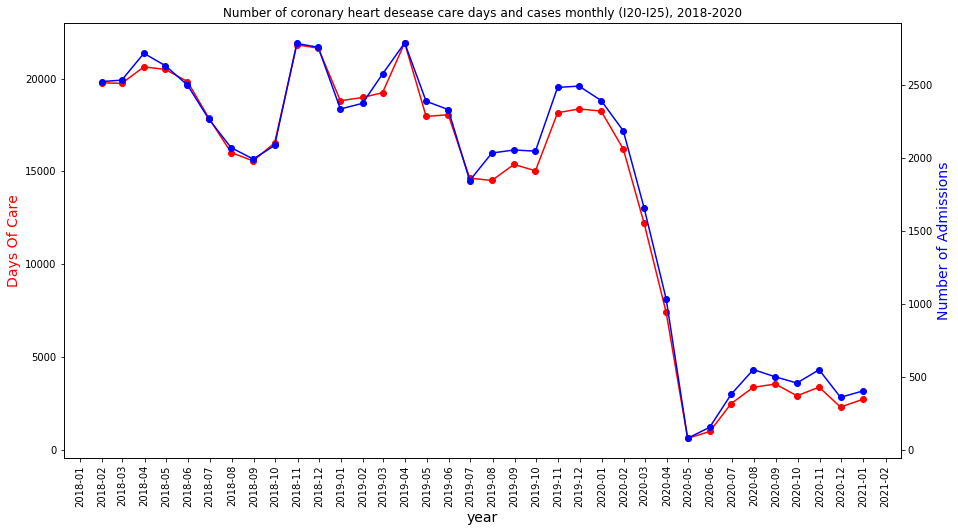

In [43]:
x = pdays_1820_heart_cases['Date']
y = pdays_1820_heart_cases['number of days of care']
z = pdays_1820_heart_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="red", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="red",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="blue",marker="o")
ax2.set_ylabel("Number of Admissions",color="blue",fontsize=14)
plt.title('Number of coronary heart desease care days and cases monthly (I20-I25), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_Heart_Desease_18_20.png')
plt.show()

In [47]:
poltava1820_stroke = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'I60-I69']
pdays_1820_stroke = df_to_days(poltava1820_stroke, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_stroke_cases = count_hospitalizations(pdays_1820_stroke, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_stroke_cases)



            number of admissions  number of days of care
Date                                                    
2018-01-31                  1499                   12514
2018-02-28                  1514                   12227
2018-03-31                  1653                   13754
2018-04-30                  1604                   13272
2018-05-31                  1714                   14334
2018-06-30                  1505                   12747
2018-07-31                  1405                   12009
2018-08-31                  1412                   11528
2018-09-30                  1464                   12190
2018-10-31                  1622                   13357
2018-11-30                  1770                   14088
2018-12-31                  1511                   13016
2019-01-31                  1414                   11701
2019-02-28                  1535                   11553
2019-03-31                  1627                   13090
2019-04-30                  155

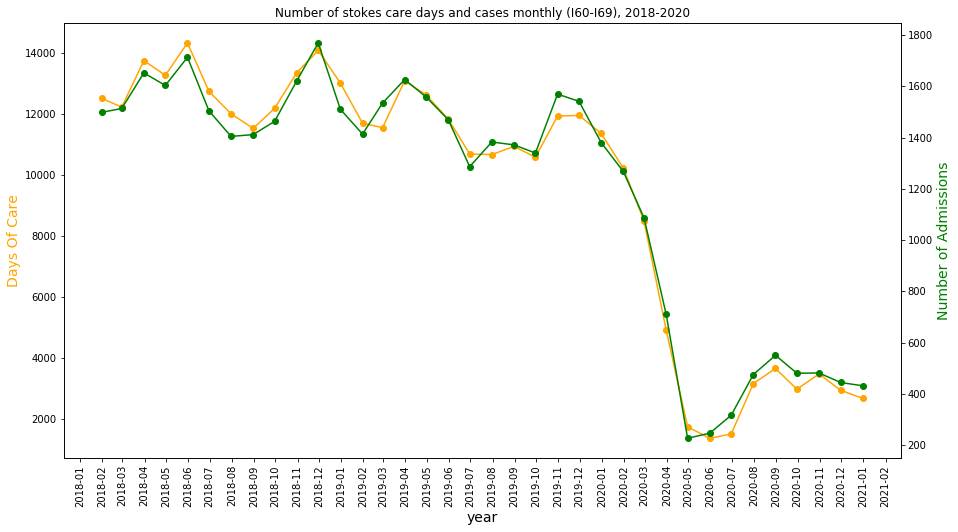

In [48]:
pdays_1820_stroke_cases = pdays_1820_stroke_cases.reset_index()
x = pdays_1820_stroke_cases['Date']
y = pdays_1820_stroke_cases['number of days of care']
z = pdays_1820_stroke_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="orange", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="orange",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="green",marker="o")
ax2.set_ylabel("Number of Admissions",color="green",fontsize=14)
plt.title('Number of stokes care days and cases monthly (I60-I69), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_Stroke_Desease_18_20.png')
plt.show()

In [49]:
poltava1820_infarction = poltava1820[poltava1820['Main_Diagnosis_L3'] == 'I21']
pdays_1820_infarction = df_to_days(poltava1820_infarction, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_infarction_cases = count_hospitalizations(pdays_1820_infarction, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_infarction_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                   138                     997
2018-02-28                   104                     940
2018-03-31                   120                     885
2018-04-30                   154                    1333
2018-05-31                   156                    1268
2018-06-30                   150                    1290
2018-07-31                   135                    1131
2018-08-31                   122                     996
2018-09-30                   121                    1061
2018-10-31                   156                    1268
2018-11-30                   158                    1476
2018-12-31                   144                    1259
2019-01-31                   123                    1133
2019-02-28                   115                     979
2019-03-31                   144                    1430
2019-04-30                   15

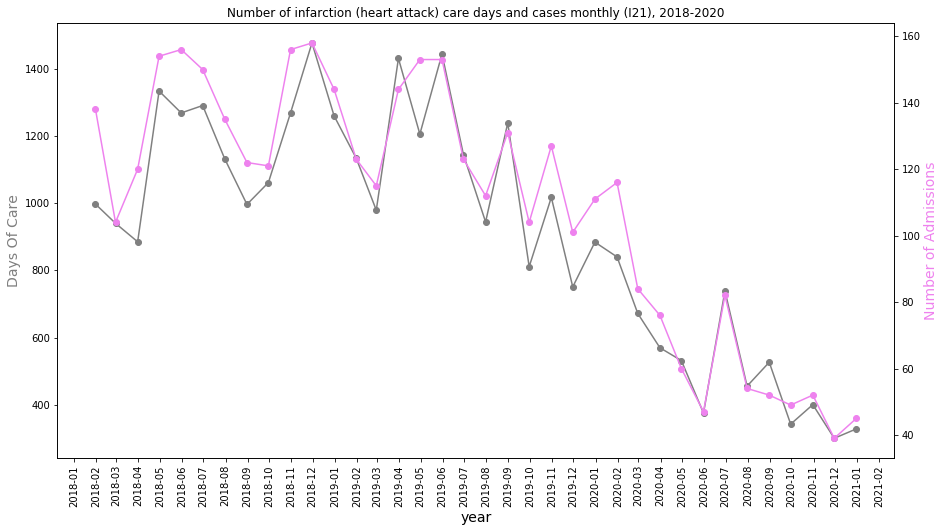

In [50]:
pdays_1820_infarction_cases = pdays_1820_infarction_cases.reset_index()
x = pdays_1820_infarction_cases['Date']
y = pdays_1820_infarction_cases['number of days of care']
z = pdays_1820_infarction_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="grey", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="grey",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="violet",marker="o")
ax2.set_ylabel("Number of Admissions",color="violet",fontsize=14)
plt.title('Number of infarction (heart attack) care days and cases monthly (I21), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_infarction_Desease_18_20.png')
plt.show()

In [51]:
poltava1820_pulmonaryembolism = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'I26-I28']
pdays_1820_pulmonaryembolism = df_to_days(poltava1820_pulmonaryembolism, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_pulmonaryembolism_cases = count_hospitalizations(pdays_1820_pulmonaryembolism, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_pulmonaryembolism_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                    16                     105
2018-02-28                    10                      93
2018-03-31                    17                     118
2018-04-30                    17                     136
2018-05-31                    17                      85
2018-06-30                    10                     120
2018-07-31                     8                      62
2018-08-31                    11                      84
2018-09-30                    11                     117
2018-10-31                    20                     164
2018-11-30                    14                      99
2018-12-31                    23                     244
2019-01-31                    19                     119
2019-02-28                    16                     190
2019-03-31                    19                     211
2019-04-30                    2

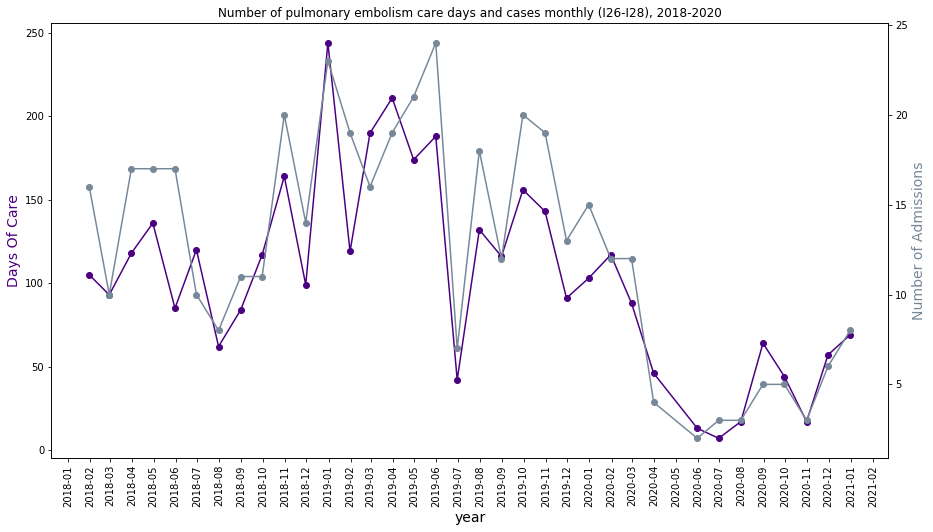

In [52]:
pdays_1820_pulmonaryembolism_cases = pdays_1820_pulmonaryembolism_cases.reset_index()
x = pdays_1820_pulmonaryembolism_cases['Date']
y = pdays_1820_pulmonaryembolism_cases['number of days of care']
z = pdays_1820_pulmonaryembolism_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="indigo", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="indigo",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="lightslategray",marker="o")
ax2.set_ylabel("Number of Admissions",color="lightslategray",fontsize=14)
plt.title('Number of pulmonary embolism care days and cases monthly (I26-I28), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_pulmonaryembolism_Desease_18_20.png')
plt.show()

In [57]:
poltava1820_flupneumonia = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'J10-J18']
poltava1820_flupneumonia = poltava1820_flupneumonia.reset_index()
poltava1820_flupneumonia['Record_ID2'] = poltava1820_flupneumonia["Record_ID"].astype(str) + "_" + poltava1820_flupneumonia["level_0"].astype(str)

In [60]:
pdays_1820_flupneumonia = df_to_days(poltava1820_flupneumonia, 'Record_ID2', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_flupneumonia_cases = count_hospitalizations(pdays_1820_flupneumonia, 'Main_Diagnosis_L2', 'Record_ID2', 'level_0')
print(pdays_1820_flupneumonia_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                  1503                   13307
2018-02-28                  1505                   12714
2018-03-31                  1503                   13022
2018-04-30                  1013                    8810
2018-05-31                   842                    7522
2018-06-30                   712                    6324
2018-07-31                   604                    5307
2018-08-31                   711                    5943
2018-09-30                   734                    6585
2018-10-31                   975                    8411
2018-11-30                  1223                   10144
2018-12-31                  1900                   16351
2019-01-31                  1853                   16134
2019-02-28                  1236                   10091
2019-03-31                  1354                   11403
2019-04-30                  134

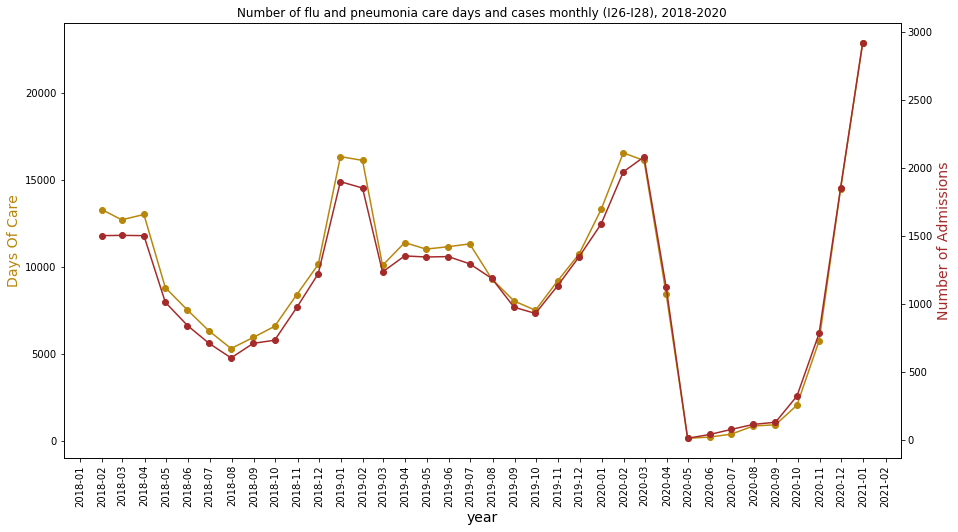

In [96]:
pdays_1820_flupneumonia_cases = pdays_1820_flupneumonia_cases.reset_index()
x = pdays_1820_flupneumonia_cases['Date']
y = pdays_1820_flupneumonia_cases['number of days of care']
z = pdays_1820_flupneumonia_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="darkgoldenrod", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="darkgoldenrod",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="brown",marker="o")
ax2.set_ylabel("Number of Admissions",color="brown",fontsize=14)
plt.title('Number of flu and pneumonia care days and cases monthly (I26-I28), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_flupneumonia_Desease_18_20.png')
plt.show()

In [63]:
poltava1820_corona = poltava1820[poltava1820['Main_Diagnosis_L3'] == 'U07']
#poltava1820_corona = poltava1820_flupneumonia.reset_index()
#poltava1820_corona['Record_ID2'] = poltava1820_corona["Record_ID"].astype(str) + "_" + poltava1820_flupneumonia["level_0"].astype(str)

In [64]:
poltava1820_corona = poltava1820[poltava1820['Main_Diagnosis_L3'] == 'U07']
pdays_1820_corona = df_to_days(poltava1820_corona, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_corona_cases = count_hospitalizations(pdays_1820_corona, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_corona_cases)

            number of admissions  number of days of care
Date                                                    
2020-04-30                     1                      16
2020-06-30                     1                      17
2020-07-31                     2                      15
2020-08-31                    10                      62
2020-09-30                    85                     548
2020-10-31                   362                    2937
2020-11-30                   566                    4241
2020-12-31                   690                    5025


In [65]:
pdays_1820_corona_cases = pdays_1820_corona_cases.reset_index()

In [79]:
pdays_pneu_corona = pdays_1820_flupneumonia_cases.merge(pdays_1820_corona_cases, on = 'Date', how = 'left')
pdays_pneu_corona = pdays_pneu_corona.fillna(0)
pdays_pneu_corona = pdays_pneu_corona.rename(columns={'number_of_admissions_x' :'number of admissions pneumonia', 'number_of_admissions_y': 'number_of_admissions_corona'})

In [80]:
pdays_pneu_corona = pdays_pneu_corona.rename(columns={'number of admissions_x' :'number of admissions pneumonia', 'number of admissions_y': 'number of admissions corona'})
pdays_pneu_corona

,Date,number of admissions pneumonia,number of days of care_x,number of admissions corona,number of days of care_y
0,2018-01-31,1503,13307,0.0,0.0
1,2018-02-28,1505,12714,0.0,0.0
2,2018-03-31,1503,13022,0.0,0.0
3,2018-04-30,1013,8810,0.0,0.0
4,2018-05-31,842,7522,0.0,0.0
5,2018-06-30,712,6324,0.0,0.0
6,2018-07-31,604,5307,0.0,0.0
7,2018-08-31,711,5943,0.0,0.0
8,2018-09-30,734,6585,0.0,0.0
9,2018-10-31,975,8411,0.0,0.0


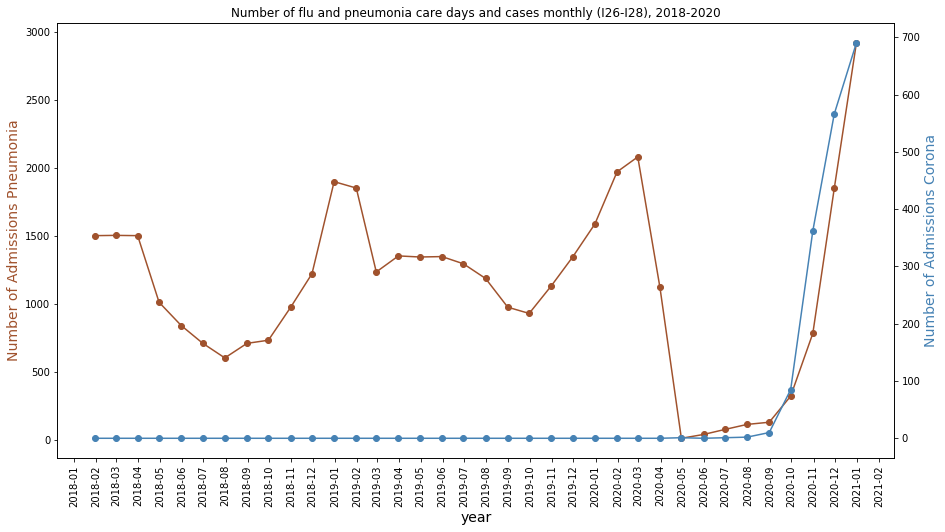

In [97]:
#pdays_pneu_corona = pdays_pneu_corona.reset_index()
x = pdays_pneu_corona['Date']
y = pdays_pneu_corona['number of admissions pneumonia']
z = pdays_pneu_corona['number of admissions corona']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="sienna", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Number of Admissions Pneumonia",color="sienna",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="steelblue",marker="o")
ax2.set_ylabel("Number of Admissions Corona",color="steelblue",fontsize=14)
plt.title('Number of flu and pneumonia care days and cases monthly (I26-I28), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_flupneumonia_corona18_20.png')
plt.show()

In [90]:
poltava1820_cold = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'J00-J06']
poltava1820_cold = poltava1820_cold.reset_index()
poltava1820_cold['Record_ID2'] = poltava1820_cold["Record_ID"].astype(str) + "_" + poltava1820_cold["level_0"].astype(str)
pdays_1820_cold = df_to_days(poltava1820_cold, 'Record_ID2', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_cold_cases = count_hospitalizations(pdays_1820_cold, 'Main_Diagnosis_L2', 'Record_ID2', 'level_0')
print(pdays_1820_cold_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                  2052                   13352
2018-02-28                  2158                   13692
2018-03-31                  2155                   14004
2018-04-30                  1541                    9943
2018-05-31                  1347                    8677
2018-06-30                  1270                    8249
2018-07-31                  1306                    8652
2018-08-31                  1459                    9413
2018-09-30                  1534                    9928
2018-10-31                  1731                   11453
2018-11-30                  1655                   10837
2018-12-31                  2268                   15215
2019-01-31                  1900                   13073
2019-02-28                  1546                   10260
2019-03-31                  1686                   11317
2019-04-30                  149

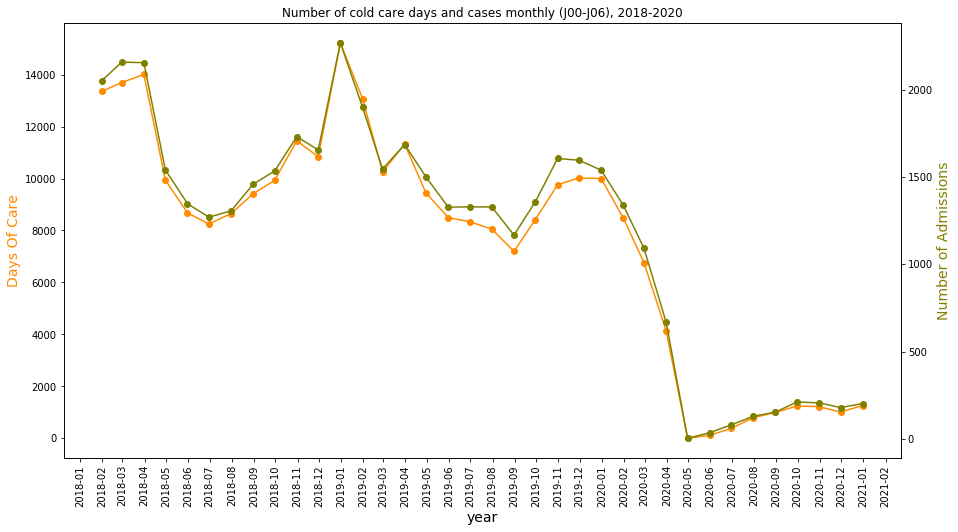

In [99]:
pdays_1820_cold_cases = pdays_1820_cold_cases.reset_index()
x = pdays_1820_cold_cases['Date']
y = pdays_1820_cold_cases['number of days of care']
z = pdays_1820_cold_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="darkorange", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="darkorange",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="olive",marker="o")
ax2.set_ylabel("Number of Admissions",color="olive",fontsize=14)
plt.title('Number of cold care days and cases monthly (J00-J06), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_Cold_18_20.png')
plt.show()

In [84]:
poltava1820_childbirthcomplications = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'O60-O75']
pdays_1820_childbirthcomplications = df_to_days(poltava1820_childbirthcomplications, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_childbirthcomplications_cases = count_hospitalizations(pdays_1820_childbirthcomplications, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_childbirthcomplications_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                   178                    1222
2018-02-28                   127                     928
2018-03-31                   143                    1031
2018-04-30                   141                     944
2018-05-31                   173                    1301
2018-06-30                   151                     966
2018-07-31                   141                     911
2018-08-31                   138                     979
2018-09-30                   140                    1040
2018-10-31                   150                     949
2018-11-30                   157                    1110
2018-12-31                   150                    1167
2019-01-31                   168                    1231
2019-02-28                   181                    1212
2019-03-31                   211                    1415
2019-04-30                   17

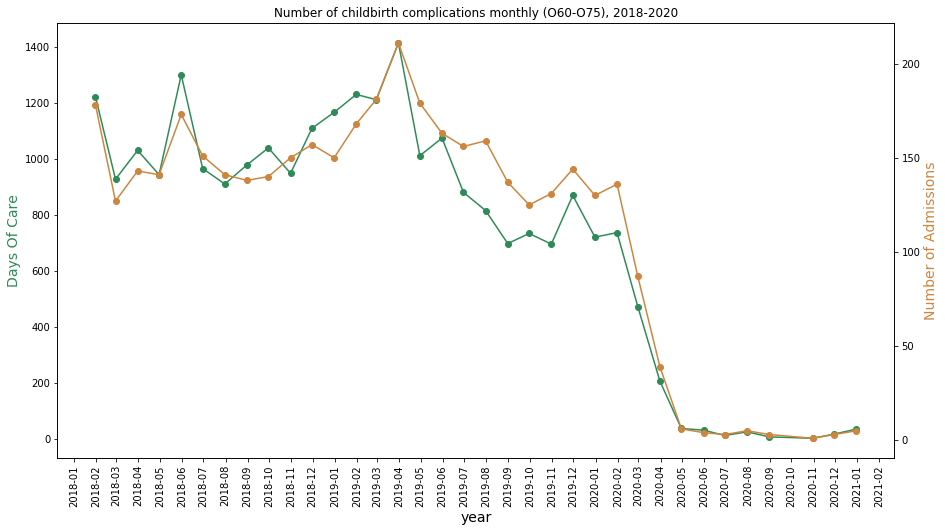

In [87]:
pdays_1820_childbirthcomplications_cases = pdays_1820_childbirthcomplications_cases.reset_index()
x = pdays_1820_childbirthcomplications_cases['Date']
y = pdays_1820_childbirthcomplications_cases['number of days of care']
z = pdays_1820_childbirthcomplications_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="seagreen", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="seagreen",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="peru",marker="o")
ax2.set_ylabel("Number of Admissions",color="peru",fontsize=14)
plt.title('Number of childbirth complications monthly (O60-O75), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_childbirthcomplications_Desease_18_20.png')
plt.show()

In [86]:
poltava1820_stomachdisease = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'K20-K31']
pdays_1820_stomachdisease = df_to_days(poltava1820_stomachdisease, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_stomachdisease_cases = count_hospitalizations(pdays_1820_stomachdisease, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_stomachdisease_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                   686                    5169
2018-02-28                   723                    5059
2018-03-31                   729                    5317
2018-04-30                   608                    4389
2018-05-31                   639                    4800
2018-06-30                   606                    4186
2018-07-31                   627                    4689
2018-08-31                   665                    4903
2018-09-30                   578                    4245
2018-10-31                   637                    4512
2018-11-30                   618                    4616
2018-12-31                   602                    4937
2019-01-31                   534                    3777
2019-02-28                   579                    4183
2019-03-31                   610                    4352
2019-04-30                   56

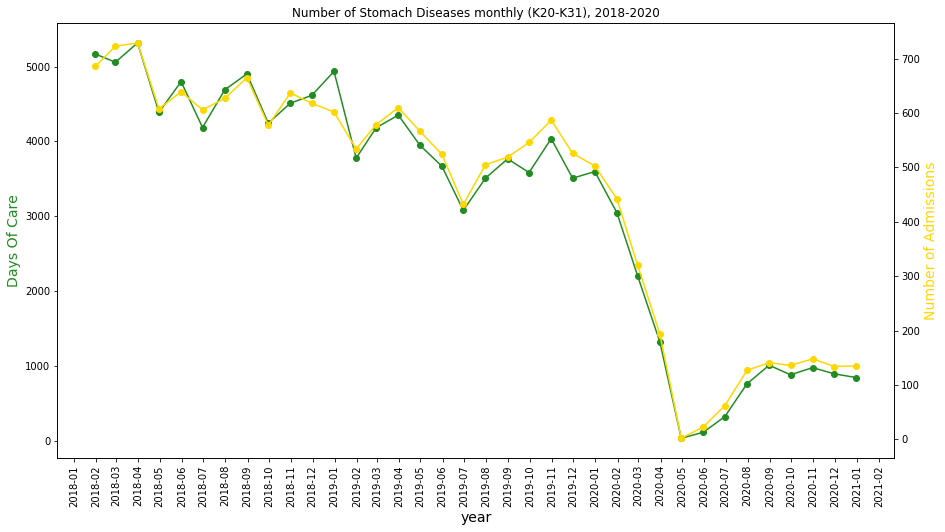

In [100]:
pdays_1820_stomachdisease_cases = pdays_1820_stomachdisease_cases.reset_index()
x = pdays_1820_stomachdisease_cases['Date']
y = pdays_1820_stomachdisease_cases['number of days of care']
z = pdays_1820_stomachdisease_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="forestgreen", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="forestgreen",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="gold",marker="o")
ax2.set_ylabel("Number of Admissions",color="gold",fontsize=14)
plt.title('Number of Stomach Diseases monthly (K20-K31), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_Stomachdisease_Desease_18_20.png')
plt.show()

In [93]:
poltava1820_tumor = poltava1820[poltava1820['Main_Diagnosis_L1'] == 'C00-D48']
pdays_1820_tumor = df_to_days(poltava1820_tumor, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')
pdays_1820_tumor_cases = count_hospitalizations(pdays_1820_tumor, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_tumor_cases)

            number of admissions  number of days of care
Date                                                    
2018-01-31                  1026                    8053
2018-02-28                  1097                    7974
2018-03-31                  1153                    8505
2018-04-30                  1040                    7916
2018-05-31                  1057                    8003
2018-06-30                   959                    7310
2018-07-31                   978                    7399
2018-08-31                   980                    7693
2018-09-30                   889                    7043
2018-10-31                  1022                    7808
2018-11-30                  1084                    8241
2018-12-31                   946                    7927
2019-01-31                   969                    7471
2019-02-28                  1096                    8111
2019-03-31                  1107                    8605
2019-04-30                  105

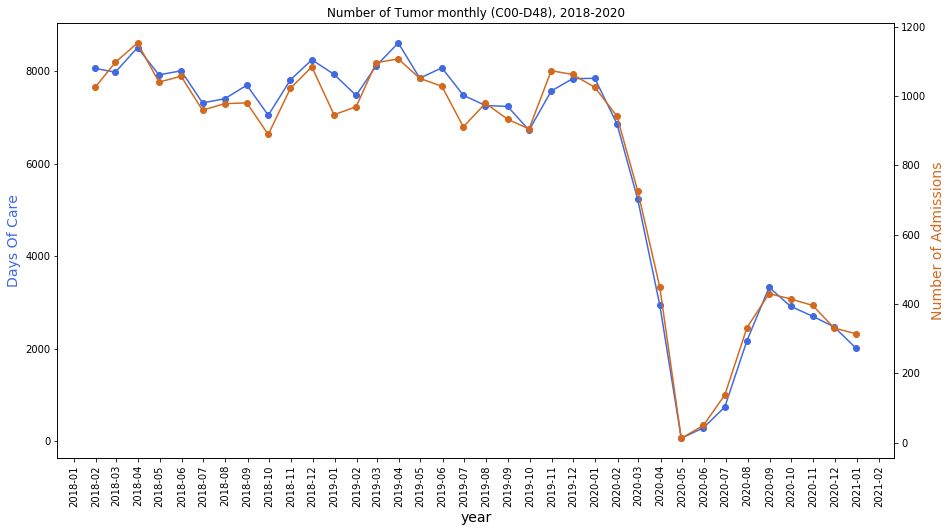

In [98]:
pdays_1820_tumor_cases = pdays_1820_tumor_cases.reset_index()
x = pdays_1820_tumor_cases['Date']
y = pdays_1820_tumor_cases['number of days of care']
z = pdays_1820_tumor_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="royalblue", marker="o")

ax.set_xlabel("year",fontsize=14)

ax.set_ylabel("Days Of Care",color="royalblue",fontsize=14)

ax2=ax.twinx()

ax2.plot(x, z,color="chocolate",marker="o")
ax2.set_ylabel("Number of Admissions",color="chocolate",fontsize=14)
plt.title('Number of Tumor monthly (C00-D48), 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_tumor_Desease_18_20.png')
plt.show()

In [101]:
poltava1820_heart = poltava1820[poltava1820['Main_Diagnosis_L2'] == 'I20-I25']

In [103]:
#df[~df.country.isin(countries_to_keep)]
hospitals_not_in_20_4 = [2008968, 1999537, 1999520, 26435008, 13961403]
poltava1820_heart_hospitals_corr = poltava1820_heart[~poltava1820_heart['Hospital_ID'].isin(hospitals_not_in_20_4)]
print(poltava1820_heart.shape)
print(poltava1820_heart_hospitals_corr.shape)

(51453, 81)
(49786, 81)


In [104]:
pdays_1820_heart_hospitals_corr = df_to_days(poltava1820_heart_hospitals_corr, 'Record_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')

    

pdays_1820_heart_hospitals_corr_cases = count_hospitalizations(pdays_1820_heart_hospitals_corr, 'Main_Diagnosis_L2', 'Record_ID', 'level_0')
print(pdays_1820_heart_hospitals_corr_cases)

pdays_1820_heart_hospitals_corr_cases = pdays_1820_heart_hospitals_corr_cases.reset_index()

            number of admissions  number of days of care
Date                                                    
2018-01-31                  2433                   18965
2018-02-28                  2451                   19075
2018-03-31                  2621                   19804
2018-04-30                  2535                   19643
2018-05-31                  2411                   19052
2018-06-30                  2187                   17243
2018-07-31                  1993                   15323
2018-08-31                  1926                   15081
2018-09-30                  2018                   15966
2018-10-31                  2691                   20948
2018-11-30                  2658                   20839
2018-12-31                  2251                   18012
2019-01-31                  2285                   18225
2019-02-28                  2458                   18255
2019-03-31                  2686                   21049
2019-04-30                  229

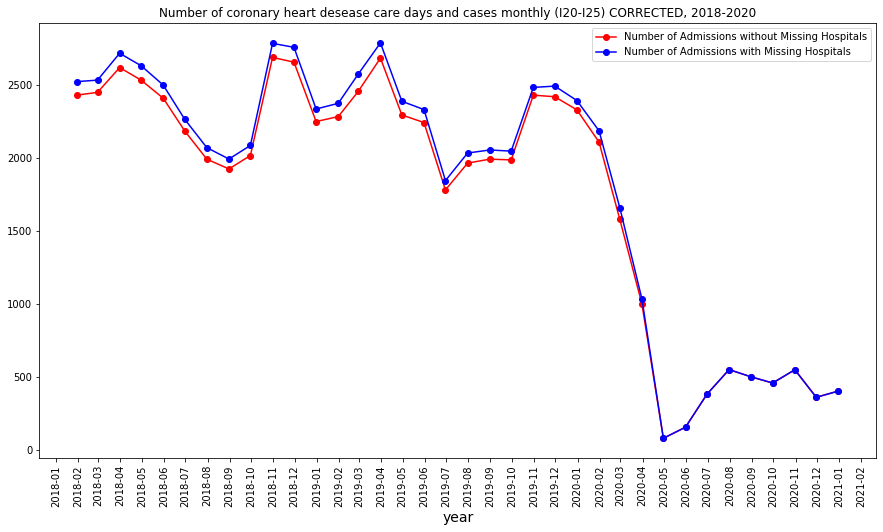

In [110]:


x = pdays_1820_heart_cases['Date']
y = pdays_1820_heart_hospitals_corr_cases['number of admissions']
z = pdays_1820_heart_cases['number of admissions']
fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="red", marker="o")

ax.set_xlabel("year",fontsize=14)

#ax.legend(["Number of Admissions without Missing Hospitals"])
#ax.set_ylabel("Number of Admissions without Missing Hospitals",color="red",fontsize=14)

#ax2=ax.twinx()

ax.plot(x, z,color="blue",marker="o")
ax.legend(["Number of Admissions without Missing Hospitals", "Number of Admissions with Missing Hospitals"])
#ax.set_ylabel("Number of Admissions with Missing Hospitals",color="blue",fontsize=14)
plt.title('Number of coronary heart desease care days and cases monthly (I20-I25) CORRECTED, 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('Poltava_Heart_Desease_Corrected_18_20.png')
plt.show()

In [3]:
poltava1820 = pd.read_csv("../mydata/Poltava2018-2020.csv")

/Users/ruska/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,4,5,6,11,12,13,14,15,16,17,18,19,20,22,23,31,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,72,73,74,75,76,77,78,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
poltava1820_blood = poltava1820[poltava1820['Main_Diagnosis_L1'] == 'I00-I99']

In [5]:
hospitals_not_in_20_4 = [2008968, 1999537, 1999520, 26435008, 13961403]
poltava1820_blood = poltava1820_blood[~poltava1820_blood['Hospital_ID'].isin(hospitals_not_in_20_4)]

In [10]:
pd.concat(g for _, g in poltava1820_blood.groupby("Record_ID") if len(g) > 1)

,Record_ID,Hospital,Hospital_ID,System_Input_Date,ID,Patient_Gender,Birth_Date,Patient_Age_Days,Hospitalization_Visit_Date,Discharge_Date,...,Package_Id,Procedure_ID.1,Service_Name,Compliance_Comment,ADSG,UDSG,Reason_of_Visit,Result_of_Care,Errors_in_Grouping,Patient_ID
556642,153,"КНП ""ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ І РІВНЯ М....",1999626,2020-02-07 00:00:00,816,1,25.12.1946,26703.0,2020-02-03,2020-02-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557610,153,"КП ""ЛУБЕНСЬКА ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ"" ...",1999388,2020-02-06 00:00:00,1245,2,1944-04-29 00:00:00,27674.0,2020-02-04,2020-02-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549478,199,"КНП ""ЗІНЬКІВСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ"" З...",1999276,2020-02-17 00:00:00,252,1,11.03.1968,18944.0,2020-01-22,2020-02-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553140,199,"КП ""ЛУБЕНСЬКА ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ"" ...",1999388,2020-02-07 00:00:00,890,2,1947-12-03 00:00:00,26353.0,2020-01-27,2020-02-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558714,224,"КП ""ЛУБЕНСЬКА ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ"" ...",1999388,2020-02-07 00:00:00,1285,1,1956-06-06 00:00:00,23254.0,2020-02-05,2020-02-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559263,224,"КНП ""ЗІНЬКІВСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ"" З...",1999276,2020-02-17 00:00:00,414,2,22.07.1958,22479.0,2020-02-06,2020-02-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559083,291,"КНП ""ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ І РІВНЯ М....",1999626,2020-02-14 00:00:00,916,2,10.01.1942,28516.0,2020-02-06,2020-02-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561341,291,"КНП ""ЗІНЬКІВСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ"" З...",1999276,2020-02-20 00:00:00,456,2,20.07.1973,17006.0,2020-02-10,2020-02-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556168,308,"КНП ""ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ І РІВНЯ М....",1999626,2020-02-17 00:00:00,779,1,13.11.1983,13229.0,2020-02-01,2020-02-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561251,308,"КНП ""ЗІНЬКІВСЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ"" З...",1999276,2020-02-21 00:00:00,118/о,2,15.04.1960,21850.0,2020-02-10,2020-02-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
poltava1820_blood['MyRecord_ID'] = poltava1820_blood['Record_ID'].astype(str) + poltava1820_blood['Hospital_ID'].astype(str)
poltava1820_blood['MyRecord_ID']

2         {9DA306D4-8C82-4409-990A-ADBD744BE59D}1999402
12        {709C08D7-5BE8-48F4-B6A3-7A29135A4CCE}1999320
16        {397F752D-EF72-4868-89C2-BBB97C5991D7}1999402
18        {C2A2B408-C1A6-4E0B-BE50-7BA5EFA89F82}1999678
24        {298BF313-2D6D-415E-A8FD-4E5D0551345B}1999253
                              ...                      
639417      c6bf54d3-859e-4281-8437-597339a80b7c1999336
639430      29df93a8-8221-4836-aa30-0803a31c20231999106
639450      a3449b3f-c0b2-190e-ba0f-d3ad89863e971999106
639458      7f972f39-01c0-474f-92bf-5fe8f69b42321999106
639461      b2dfc30a-1992-50e2-b245-c819f30ed5cf1999106
Name: MyRecord_ID, Length: 117806, dtype: object

In [12]:
poltava1820_blood_days = df_to_days(poltava1820_blood, 'MyRecord_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')


In [13]:
poltava1820_blood_days = poltava1820_blood_days[poltava1820_blood_days['Date'] >= '2018-1-1']
poltava1820_blood_days = poltava1820_blood_days[poltava1820_blood_days['Date'] < '2021-1-1']

In [14]:
poltava1820_blood_days = poltava1820_blood_days[poltava1820_blood_days['Days_In_Hospital'] <= 50]

In [16]:
poltava1820_blood_L3_M = poltava1820_blood_days.groupby([pd.Grouper(key = 'Date', freq='M'),'Main_Diagnosis_L3'])['Record_ID'].nunique()
poltava1820_blood_L3_M

Date        Main_Diagnosis_L3
2018-01-31  I01                   3
            I05                  16
            I06                   3
            I07                   1
            I08                  11
                                 ..
2020-12-31  I85                   5
            I86                   2
            I87                   4
            I88                  19
            I95                   2
Name: Record_ID, Length: 1945, dtype: int64

In [17]:
poltava1820_blood_L3_M = poltava1820_blood_L3_M.reset_index()

In [19]:
poltava1820_I21_M = poltava1820_blood_L3_M[poltava1820_blood_L3_M['Main_Diagnosis_L3']=='I21']

In [20]:
poltava1820_I21_M

,Date,Main_Diagnosis_L3,Record_ID
12,2018-01-31,I21,135
75,2018-02-28,I21,104
141,2018-03-31,I21,119
206,2018-04-30,I21,151
266,2018-05-31,I21,154
327,2018-06-30,I21,148
382,2018-07-31,I21,131
438,2018-08-31,I21,119
495,2018-09-30,I21,117
554,2018-10-31,I21,155


In [21]:
poltava1820_blood_L1_M = poltava1820_blood_L3_M.groupby(['Date'])['Record_ID'].sum()
poltava1820_blood_L1_M

Date
2018-01-31    5887
2018-02-28    6010
2018-03-31    6175
2018-04-30    5684
2018-05-31    5619
2018-06-30    5019
2018-07-31    4669
2018-08-31    4584
2018-09-30    4720
2018-10-31    5838
2018-11-30    6042
2018-12-31    5173
2019-01-31    5099
2019-02-28    5608
2019-03-31    5962
2019-04-30    5423
2019-05-31    5272
2019-06-30    4351
2019-07-31    4840
2019-08-31    4705
2019-09-30    4765
2019-10-31    5650
2019-11-30    5727
2019-12-31    5309
2020-01-31    4857
2020-02-29    3835
2020-03-31    2350
2020-04-30     308
2020-05-31     454
2020-06-30     924
2020-07-31    1436
2020-08-31    1523
2020-09-30    1418
2020-10-31    1596
2020-11-30    1201
2020-12-31    1296
Name: Record_ID, dtype: int64

In [24]:
bloodM = poltava1820_blood_L1_M.values

In [26]:
datesM = poltava1820_blood_L1_M.index.values

In [28]:
BloodUrgentList = ['I21', 'I22', 'I60', 'I61', 'I63', 'I70']
BloodNOTUrgentList = ['I20', 'I83']

UrgentSeriesDict = {}
for code in BloodUrgentList:
    s = poltava1820_blood_L3_M[poltava1820_blood_L3_M['Main_Diagnosis_L3']== code]['Record_ID']
    UrgentSeriesDict[code] = s

In [29]:
NOTUrgentSeriesDict = {}
for code in BloodNOTUrgentList:
    s = poltava1820_blood_L3_M[poltava1820_blood_L3_M['Main_Diagnosis_L3']== code]['Record_ID']
    NOTUrgentSeriesDict[code] = s

In [39]:
poltavaI83 = poltava1820_blood_L3_M[poltava1820_blood_L3_M['Main_Diagnosis_L3']== 'I83']

In [36]:
l1 = ['Date', 'Main_Diagnosis_L3', 'Record_ID']
l2 = ['2020-04-30', 'I83', 0]
L = dict(zip(l1,l2))
L

{'Date': '2020-04-30', 'Main_Diagnosis_L3': 'I83', 'Record_ID': 0}

In [38]:


I83_df = pd.DataFrame(L, index = [1600])
I83_df

,Date,Main_Diagnosis_L3,Record_ID
1600,2020-04-30,I83,0


In [40]:
poltavaI83_corr = poltavaI83.append([I83_df])
poltavaI83_corr

,Date,Main_Diagnosis_L3,Record_ID
54,2018-01-31 00:00:00,I83,178
118,2018-02-28 00:00:00,I83,197
183,2018-03-31 00:00:00,I83,179
247,2018-04-30 00:00:00,I83,140
306,2018-05-31 00:00:00,I83,110
361,2018-06-30 00:00:00,I83,83
422,2018-07-31 00:00:00,I83,69
477,2018-08-31 00:00:00,I83,78
534,2018-09-30 00:00:00,I83,98
596,2018-10-31 00:00:00,I83,151


In [42]:
poltavaI83_corr = poltavaI83_corr.sort_index()
poltavaI83_corr

,Date,Main_Diagnosis_L3,Record_ID
54,2018-01-31 00:00:00,I83,178
118,2018-02-28 00:00:00,I83,197
183,2018-03-31 00:00:00,I83,179
247,2018-04-30 00:00:00,I83,140
306,2018-05-31 00:00:00,I83,110
361,2018-06-30 00:00:00,I83,83
422,2018-07-31 00:00:00,I83,69
477,2018-08-31 00:00:00,I83,78
534,2018-09-30 00:00:00,I83,98
596,2018-10-31 00:00:00,I83,151


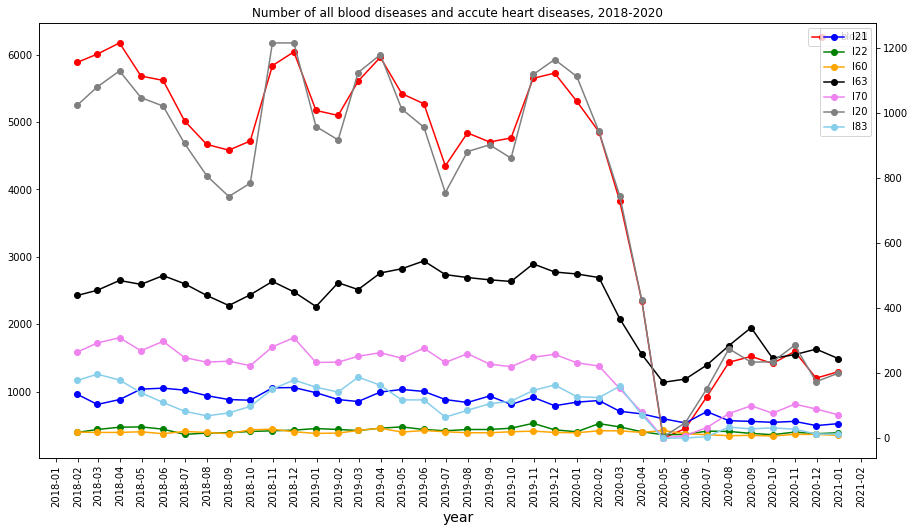

In [43]:
x = datesM
y = bloodM
I21 = UrgentSeriesDict['I21']
I22 = UrgentSeriesDict['I22']
I60 = UrgentSeriesDict['I60']
I63 = UrgentSeriesDict['I63']
I70 = UrgentSeriesDict['I70']
I20 = NOTUrgentSeriesDict['I20']
I83 = poltavaI83_corr['Record_ID']

fig,ax = plt.subplots(figsize=(15, 8))


ax.plot(x, y, color="red", marker="o")

ax.set_xlabel("year",fontsize=14)

ax2=ax.twinx()
ax2.plot(x, I21,color="blue",marker="o")
ax2.plot(x, I22,color="green",marker="o")
ax2.plot(x, I60,color="orange",marker="o")
ax2.plot(x, I63,color="black",marker="o")
ax2.plot(x, I70,color="violet",marker="o")
ax2.plot(x, I20,color="grey",marker="o")
ax2.plot(x, I83,color="skyblue",marker="o")



ax.legend(['blood'])
ax2.legend(['I21', 'I22', 'I60', 'I63', 'I70', 'I20', 'I83'])
#ax.set_ylabel("Number of Admissions with Missing Hospitals",color="blue",fontsize=14)
plt.title('Number of all blood diseases and accute heart diseases, 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_Heart_Desease_Corrected_18_20.png')
plt.show()

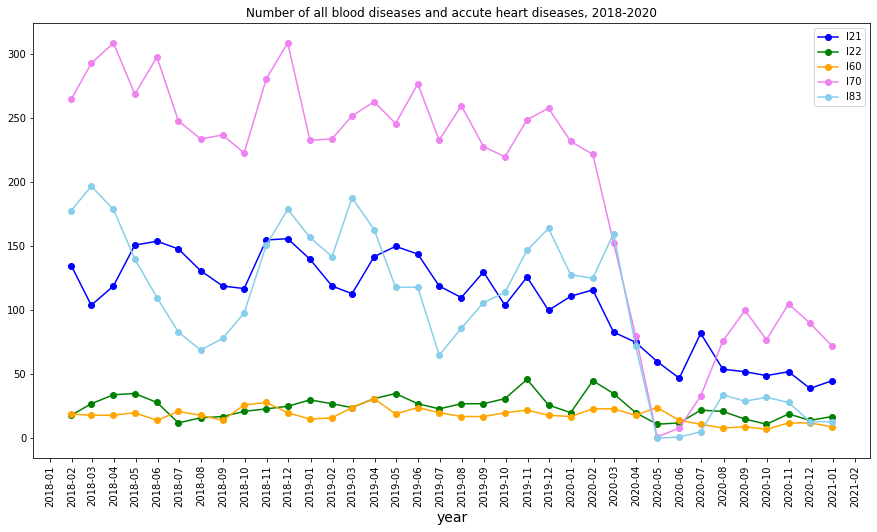

In [44]:
x = datesM
I21 = UrgentSeriesDict['I21']
I22 = UrgentSeriesDict['I22']
I60 = UrgentSeriesDict['I60']

I70 = UrgentSeriesDict['I70']

I83 = poltavaI83_corr['Record_ID']

fig,ax = plt.subplots(figsize=(15, 8))

ax.set_xlabel("year",fontsize=14)


ax.plot(x, I21,color="blue",marker="o")
ax.plot(x, I22,color="green",marker="o")
ax.plot(x, I60,color="orange",marker="o")

ax.plot(x, I70,color="violet",marker="o")

ax.plot(x, I83,color="skyblue",marker="o")

ax.legend(['I21', 'I22', 'I60', 'I70', 'I83'])
#ax.set_ylabel("Number of Admissions with Missing Hospitals",color="blue",fontsize=14)
plt.title('Number of all blood diseases and accute heart diseases, 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_Heart_Desease_Corrected_18_20.png')
plt.show()


In [5]:
hospitals_not_in_20_4 = [2008968, 1999537, 1999520, 26435008, 13961403]
poltava1820_corr = poltava1820[~poltava1820['Hospital_ID'].isin(hospitals_not_in_20_4)]

In [6]:
poltava1820_corr = poltava1820_corr[poltava1820_corr['Days_In_Hospital'] <= 50]

In [7]:
poltava1820_corr['MyRecord_ID'] = poltava1820_corr['Record_ID'].astype(str) + poltava1820_corr['Hospital_ID'].astype(str)
poltava1820_corr['MyRecord_ID']

0         {3F60A2FA-92F5-4419-8137-6C023F74970B}1999388
1         {5966BAF6-523C-4949-B7DB-5D628B242C94}1999276
2         {9DA306D4-8C82-4409-990A-ADBD744BE59D}1999402
3         {00862DD8-A2C3-4AA3-BEC3-70719FDCFF76}1999253
4         {673E95CE-8EFB-4677-8227-E7E62BB8E1DE}1999388
                              ...                      
639457      48d26349-2fbf-4598-99f8-7f3a1720773a1999690
639458      7f972f39-01c0-474f-92bf-5fe8f69b42321999106
639459      3c6cc4d8-538b-319f-a17a-4d97926df8cc1999106
639460      a6621ad2-e11b-3f7f-8edc-a5bb804a67b41204348
639461      b2dfc30a-1992-50e2-b245-c819f30ed5cf1999106
Name: MyRecord_ID, Length: 623624, dtype: object

In [55]:
poltava1820_corr_days = df_to_days(poltava1820_corr, 'MyRecord_ID', 'Hospitalization_Visit_Date', 'Discharge_Date')

In [56]:
poltava1820_corr_days = poltava1820_corr_days[poltava1820_corr_days['Date'] >= '2018-1-1']
poltava1820_corr_days = poltava1820_corr_days[poltava1820_corr_days['Date'] < '2021-1-1']

In [57]:
poltava1820_corr_L2_M = poltava1820_corr_days.groupby([pd.Grouper(key = 'Date', freq='M'),'Main_Diagnosis_L2'])['MyRecord_ID'].nunique()
poltava1820_corr_L2_M

Date        Main_Diagnosis_L2
2018-01-31  A00-A09              371
            A15-A19               18
            A20-A28                3
            A30-A49               40
            A65-A69                1
                                ... 
2020-12-31  U00-U49              690
            U78-U88                1
            Z30-Z39              162
            Z40-Z54               27
            Z80-Z99                1
Name: MyRecord_ID, Length: 6058, dtype: int64

In [58]:
poltava1820_corr_L2_M = poltava1820_corr_L2_M.reset_index()

In [59]:
poltava1820_corr_L2_M

,Date,Main_Diagnosis_L2,MyRecord_ID
0,2018-01-31,A00-A09,371
1,2018-01-31,A15-A19,18
2,2018-01-31,A20-A28,3
3,2018-01-31,A30-A49,40
4,2018-01-31,A65-A69,1
...,...,...,...
6053,2020-12-31,U00-U49,690
6054,2020-12-31,U78-U88,1
6055,2020-12-31,Z30-Z39,162
6056,2020-12-31,Z40-Z54,27


In [72]:
L2_List = ['I20-I25', 'I60-69', 'J10-J18', 'U00-U49', 'J00-J06', 'O60-O75']
L2_List_Names = ['Coronary Heart Diseases', 'Strokes', 'Flu and Pneumonia', 'COVID', 'Usual Cold', 'Complications of childbirth']



In [62]:
date = poltava1820_corr_L2_M['Date'].unique()
date

array(['2018-01-31T00:00:00.000000000', '2018-02-28T00:00:00.000000000',
       '2018-03-31T00:00:00.000000000', '2018-04-30T00:00:00.000000000',
       '2018-05-31T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-07-31T00:00:00.000000000', '2018-08-31T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-11-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-01-31T00:00:00.000000000', '2019-02-28T00:00:00.000000000',
       '2019-03-31T00:00:00.000000000', '2019-04-30T00:00:00.000000000',
       '2019-05-31T00:00:00.000000000', '2019-06-30T00:00:00.000000000',
       '2019-07-31T00:00:00.000000000', '2019-08-31T00:00:00.000000000',
       '2019-09-30T00:00:00.000000000', '2019-10-31T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-01-31T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-04-30

In [95]:
L2_List = ['I20-I25', 'I60-I69', 'J10-J18', 'U00-U49', 'J00-J06', 'O80-O84']
L2_List_Names = ['Coronary Heart Diseases', 'Strokes', 'Flu and Pneumonia', 'COVID', 'Usual Cold', 'Complications of childbirth']


In [96]:

DL2SeriesDict = {}
for code in L2_List:
    print(code)
    s = poltava1820_corr_L2_M[poltava1820_corr_L2_M['Main_Diagnosis_L2']== code]['MyRecord_ID']
    DL2SeriesDict[code] = s

I20-I25
I60-I69
J10-J18
U00-U49
J00-J06
O80-O84


In [86]:
poltava1820_corr_L2_M_Covid = poltava1820_corr_L2_M[poltava1820_corr_L2_M['Main_Diagnosis_L2'] == 'U00-U49']

In [87]:
poltava1820_corr_L2_M_Covid 

,Date,Main_Diagnosis_L2,MyRecord_ID
4860,2020-04-30,U00-U49,1
5110,2020-06-30,U00-U49,1
5262,2020-07-31,U00-U49,2
5427,2020-08-31,U00-U49,10
5583,2020-09-30,U00-U49,85
5740,2020-10-31,U00-U49,362
5896,2020-11-30,U00-U49,566
6053,2020-12-31,U00-U49,690


In [88]:
poltava1820_corr_L2_M_heart = poltava1820_corr_L2_M[poltava1820_corr_L2_M['Main_Diagnosis_L2'] == 'I20-I25']

In [89]:
corona = poltava1820_corr_L2_M_heart.merge(poltava1820_corr_L2_M_Covid, on = 'Date', how = 'left')
corona

,Date,Main_Diagnosis_L2_x,MyRecord_ID_x,Main_Diagnosis_L2_y,MyRecord_ID_y
0,2018-01-31,I20-I25,2433,NaN,NaN
1,2018-02-28,I20-I25,2451,NaN,NaN
2,2018-03-31,I20-I25,2621,NaN,NaN
3,2018-04-30,I20-I25,2535,NaN,NaN
4,2018-05-31,I20-I25,2411,NaN,NaN
5,2018-06-30,I20-I25,2187,NaN,NaN
6,2018-07-31,I20-I25,1993,NaN,NaN
7,2018-08-31,I20-I25,1926,NaN,NaN
8,2018-09-30,I20-I25,2018,NaN,NaN
9,2018-10-31,I20-I25,2691,NaN,NaN


In [90]:
corona = corona.fillna(0)

In [92]:
scorona = corona['MyRecord_ID_y'].values

In [117]:
L2_List_Names_2 = ['Coronary Heart Diseases', 'Strokes', 'Flu and Pneumonia', 'COVID', 'Childbirth']


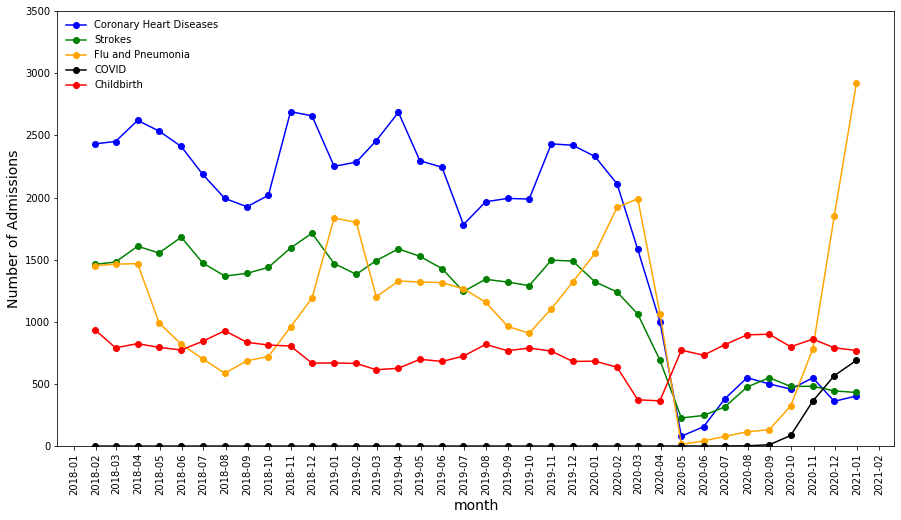

In [118]:
x = date

I2025 = DL2SeriesDict['I20-I25'].values
I6069 = DL2SeriesDict['I60-I69'].values
J1018 = DL2SeriesDict['J10-J18'].values
U0049 = scorona
#J0006 = DL2SeriesDict['J00-J06'].values
O6075 = DL2SeriesDict['O80-O84'].values


fig,ax = plt.subplots(figsize=(15, 8))


ax.set_xlabel("month",fontsize=14)

ax.plot(x, I2025,color="blue",marker="o")
ax.plot(x, I6069,color="green",marker="o")
ax.plot(x, J1018,color="orange",marker="o")
ax.plot(x, U0049,color="black",marker="o")
#ax.plot(x, J0006,color="violet",marker="o")
ax.plot(x, O6075,color="red",marker="o")
#ax.plot(x, I83,color="skyblue",marker="o")

ax.set_ylim([0,3500])
ax.legend(L2_List_Names_2, frameon=False, loc = "upper left")
ax.set_ylabel("Number of Admissions",fontsize=14)

#ax.set_ylabel("Number of Admissions with Missing Hospitals",color="blue",fontsize=14)
#plt.title('Number of admissions of selected disease groups, Poltava Oblast, 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

plt.savefig('./images/Poltava_Selected_Diseases_18_20.png')
plt.show()

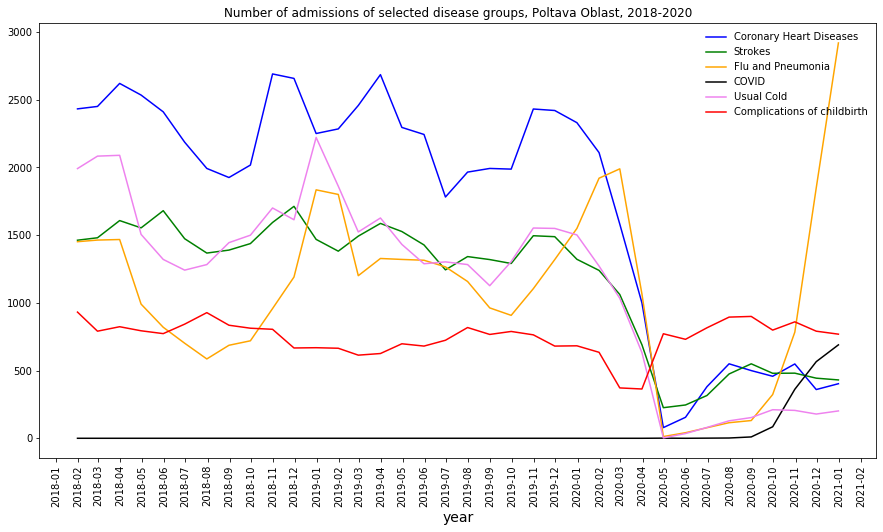

In [104]:
x = date

I2025 = DL2SeriesDict['I20-I25'].values
I6069 = DL2SeriesDict['I60-I69'].values
J1018 = DL2SeriesDict['J10-J18'].values
U0049 = scorona
J0006 = DL2SeriesDict['J00-J06'].values
O6075 = DL2SeriesDict['O80-O84'].values


fig,ax = plt.subplots(figsize=(15, 8))


ax.set_xlabel("year",fontsize=14)

ax.plot(x, I2025,color="blue")
ax.plot(x, I6069,color="green")
ax.plot(x, J1018,color="orange")
ax.plot(x, U0049,color="black")
ax.plot(x, J0006,color="violet")
ax.plot(x, O6075,color="red")
#ax.plot(x, I83,color="skyblue",marker="o")

ax.legend(L2_List_Names, frameon=False, loc = "upper right")

#ax.set_ylabel("Number of Admissions with Missing Hospitals",color="blue",fontsize=14)
plt.title('Number of admissions of selected disease groups, Poltava Oblast, 2018-2020')
ax.tick_params(axis='x', rotation=90)
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
from matplotlib import pyplot as plt

#plt.savefig('Poltava_Heart_Desease_Corrected_18_20.png')
plt.show()

In [120]:
pdays20_4 = pd.read_pickle("../mydata/Poltava2020_4_days_all_diagnosis.pkl")

In [121]:
pdays20_4 

,Date,Record_ID,index,Hospital_ID,Reporting_Month,Data_Source,Type_of_Referral,Finance_Program,Referral_ID,Position_of_Doctor_Who_Gave_Referral,...,Discharge_Month,Discharge_Day,Discharge_Year,Hospitalization_Day,Main_Diagnosis_L1,Main_Diagnosis_L1_name,Main_Diagnosis_L2,Main_Diagnosis_L2_name,Main_Diagnosis_L3,Main_Diagnosis_L3_name
0,2020-09-11,00030933-8931-4e8c-a7da-a9aa5877fa17,137890,1999307,вересень,EHEALTH,Без направлення,NaN,NaN,NaN,...,9,22,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M60-M79,Хвороби м'яких тканин,M60,Міозит
1,2020-09-12,00030933-8931-4e8c-a7da-a9aa5877fa17,137890,1999307,вересень,EHEALTH,Без направлення,NaN,NaN,NaN,...,9,22,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M60-M79,Хвороби м'яких тканин,M60,Міозит
2,2020-09-13,00030933-8931-4e8c-a7da-a9aa5877fa17,137890,1999307,вересень,EHEALTH,Без направлення,NaN,NaN,NaN,...,9,22,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M60-M79,Хвороби м'яких тканин,M60,Міозит
3,2020-09-14,00030933-8931-4e8c-a7da-a9aa5877fa17,137890,1999307,вересень,EHEALTH,Без направлення,NaN,NaN,NaN,...,9,22,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M60-M79,Хвороби м'яких тканин,M60,Міозит
4,2020-09-15,00030933-8931-4e8c-a7da-a9aa5877fa17,137890,1999307,вересень,EHEALTH,Без направлення,NaN,NaN,NaN,...,9,22,2020,10,M00-M99,ХВОРОБИ КІСТКОВО-М`ЯЗОВОЇ С-МИ І СПОЛУЧНИХ ТКАНИН,M60-M79,Хвороби м'яких тканин,M60,Міозит
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440680,2020-04-11,s9970,34211,1999655,квітень,NHSU,NaN,Програма медичних гарантій в 2020 році,71232,NaN,...,4,14,2020,8,I00-I99,ХВОРОБИ СИСТЕМИ КРОВООБІГУ,I60-I69,Ураження судин головного мозку,I63,Iнфаркт головного мозку
440681,2020-04-12,s9970,34211,1999655,квітень,NHSU,NaN,Програма медичних гарантій в 2020 році,71232,NaN,...,4,14,2020,8,I00-I99,ХВОРОБИ СИСТЕМИ КРОВООБІГУ,I60-I69,Ураження судин головного мозку,I63,Iнфаркт головного мозку
440682,2020-04-13,s9970,34211,1999655,квітень,NHSU,NaN,Програма медичних гарантій в 2020 році,71232,NaN,...,4,14,2020,8,I00-I99,ХВОРОБИ СИСТЕМИ КРОВООБІГУ,I60-I69,Ураження судин головного мозку,I63,Iнфаркт головного мозку
440683,2020-04-14,s9970,34211,1999655,квітень,NHSU,NaN,Програма медичних гарантій в 2020 році,71232,NaN,...,4,14,2020,8,I00-I99,ХВОРОБИ СИСТЕМИ КРОВООБІГУ,I60-I69,Ураження судин головного мозку,I63,Iнфаркт головного мозку


In [122]:
PoltavaU_20_All = pdays20_4.groupby([pd.Grouper(key = 'Date', freq='M'), 'Urgency'])['Record_ID'].nunique()
PoltavaU_20_All

Date        Urgency  
2020-03-31  Планове         52
            Ургентне       187
2020-04-30  Планове        302
            Ургентне      1271
2020-05-31  Планове        529
            Ургентне      1558
2020-06-30  Планове       1351
            Ургентне      2256
            примусове        1
2020-07-31  Планове       3279
            Ургентне      3745
2020-08-31  Планове       3681
            Ургентне      4829
2020-09-30  Планове       3356
            Ургентне      5969
            примусове        1
2020-10-31  Планове       2979
            Ургентне      7336
2020-11-30  Планове       1660
            Ургентне      8178
            примусове        4
2020-12-31  Планове       1839
            Ургентне     10086
2021-01-31  Планове        409
            Ургентне      2138
Name: Record_ID, dtype: int64

In [123]:
PoltavaU_20_All = PoltavaU_20_All.reset_index()
PoltavaU_20_All

,Date,Urgency,Record_ID
0,2020-03-31,Планове,52
1,2020-03-31,Ургентне,187
2,2020-04-30,Планове,302
3,2020-04-30,Ургентне,1271
4,2020-05-31,Планове,529
5,2020-05-31,Ургентне,1558
6,2020-06-30,Планове,1351
7,2020-06-30,Ургентне,2256
8,2020-06-30,примусове,1
9,2020-07-31,Планове,3279


In [125]:
PoltavaU_20_All_pivot = PoltavaU_20_All.pivot_table(index="Date", columns="Urgency", values="Record_ID")
PoltavaU_20_All_pivot

Urgency,Планове,Ургентне,примусове
Date,,,
2020-03-31,52.0,187.0,NaN
2020-04-30,302.0,1271.0,NaN
2020-05-31,529.0,1558.0,NaN
2020-06-30,1351.0,2256.0,1.0
2020-07-31,3279.0,3745.0,NaN
2020-08-31,3681.0,4829.0,NaN
2020-09-30,3356.0,5969.0,1.0
2020-10-31,2979.0,7336.0,NaN
2020-11-30,1660.0,8178.0,4.0


In [126]:
PoltavaU_20_All_pivot = PoltavaU_20_All_pivot.reset_index()
PoltavaU_20_All_pivot

Urgency,Date,Планове,Ургентне,примусове
0,2020-03-31,52.0,187.0,NaN
1,2020-04-30,302.0,1271.0,NaN
2,2020-05-31,529.0,1558.0,NaN
3,2020-06-30,1351.0,2256.0,1.0
4,2020-07-31,3279.0,3745.0,NaN
5,2020-08-31,3681.0,4829.0,NaN
6,2020-09-30,3356.0,5969.0,1.0
7,2020-10-31,2979.0,7336.0,NaN
8,2020-11-30,1660.0,8178.0,4.0
9,2020-12-31,1839.0,10086.0,NaN


In [128]:
PoltavaU_20_All_pivot.drop(['примусове'], axis=1, inplace = True)

In [129]:
PoltavaU_20_All_pivot

Urgency,Date,Планове,Ургентне
0,2020-03-31,52.0,187.0
1,2020-04-30,302.0,1271.0
2,2020-05-31,529.0,1558.0
3,2020-06-30,1351.0,2256.0
4,2020-07-31,3279.0,3745.0
5,2020-08-31,3681.0,4829.0
6,2020-09-30,3356.0,5969.0
7,2020-10-31,2979.0,7336.0
8,2020-11-30,1660.0,8178.0
9,2020-12-31,1839.0,10086.0


In [130]:

PoltavaU_20_All_pivot = PoltavaU_20_All_pivot.reset_index().rename_axis(None, axis=1)
PoltavaU_20_All_pivot

,index,Date,Планове,Ургентне
0,0,2020-03-31,52.0,187.0
1,1,2020-04-30,302.0,1271.0
2,2,2020-05-31,529.0,1558.0
3,3,2020-06-30,1351.0,2256.0
4,4,2020-07-31,3279.0,3745.0
5,5,2020-08-31,3681.0,4829.0
6,6,2020-09-30,3356.0,5969.0
7,7,2020-10-31,2979.0,7336.0
8,8,2020-11-30,1660.0,8178.0
9,9,2020-12-31,1839.0,10086.0


In [132]:
PoltavaU_20_All_pivot = PoltavaU_20_All_pivot.drop(['index'], axis = 1)

In [133]:
PoltavaU_20_All_pivot.set_index('Date', inplace = True)

In [138]:
PoltavaU_20_All_pivot.columns = ['Planned', 'Urgent']


In [140]:
PoltavaU_20_All_pivot

,Planned,Urgent
Date,,
2020-03-31,52.0,187.0
2020-04-30,302.0,1271.0
2020-05-31,529.0,1558.0
2020-06-30,1351.0,2256.0
2020-07-31,3279.0,3745.0
2020-08-31,3681.0,4829.0
2020-09-30,3356.0,5969.0
2020-10-31,2979.0,7336.0
2020-11-30,1660.0,8178.0


In [146]:
#[df.index[1]
PoltavaU_20_All_pivot = PoltavaU_20_All_pivot.drop([PoltavaU_20_All_pivot.index[10]])


[Text(0, 0, '2020-03'),
 Text(0, 0, '2020-04'),
 Text(0, 0, '2020-05'),
 Text(0, 0, '2020-06'),
 Text(0, 0, '2020-07'),
 Text(0, 0, '2020-08'),
 Text(0, 0, '2020-09'),
 Text(0, 0, '2020-10'),
 Text(0, 0, '2020-11'),
 Text(0, 0, '2020-12')]

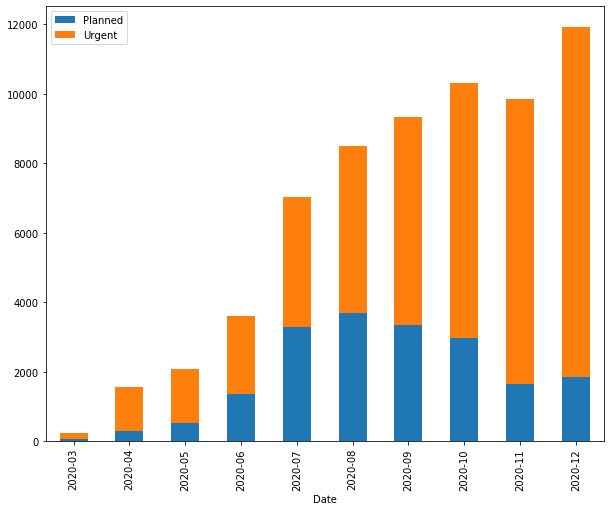

In [147]:
import matplotlib.pyplot as plt
#PoltavaU_11_M_pivot = PoltavaU_11_M_pivot.set_index('Date')
fig, ax = plt.subplots(figsize=(10,8))
PoltavaU_20_All_pivot.plot(ax = ax, kind='bar',stacked=True)
ax.xaxis.set_ticklabels(PoltavaU_20_All_pivot.index.to_period('M'))

PoltavaU_20_All_pivot

In [136]:
PoltavaU_20_All_pivot

,Планове,Ургентне
Date,,
2020-03-31,52.0,187.0
2020-04-30,302.0,1271.0
2020-05-31,529.0,1558.0
2020-06-30,1351.0,2256.0
2020-07-31,3279.0,3745.0
2020-08-31,3681.0,4829.0
2020-09-30,3356.0,5969.0
2020-10-31,2979.0,7336.0
2020-11-30,1660.0,8178.0


In [148]:
poltava1820_corr_L1_M = poltava1820_corr_days.groupby([pd.Grouper(key = 'Date', freq='M'),'Main_Diagnosis_L1'])['MyRecord_ID'].nunique()
poltava1820_corr_L1_M

Date        Main_Diagnosis_L1
2018-01-31  A00-B99               675
            C00-D48              1010
            D50-D89                92
            E00-E99               572
            F00-F99               389
                                 ... 
2020-12-31  S00-T99               759
            U00-U85               690
            U78-U88                 1
            V00-Z99                 2
            Z00-Z99               190
Name: MyRecord_ID, Length: 756, dtype: int64

In [149]:
poltava1820_corr_L1_M = poltava1820_corr_L1_M.reset_index()

In [150]:
poltava1820_corr_L1_Q = poltava1820_corr.groupby([pd.Grouper(key = 'Date', freq='Q'), 'Main_Diagnosis_L1'])['MyRecord_ID'].nunique()
poltava1820_corr_L1_Q 

Date        Main_Diagnosis_L1
2018-03-31  A00-B99              2374
            C00-D48              3238
            D50-D89               287
            E00-E99              1911
            F00-F99              1116
                                 ... 
2020-12-31  S00-T99              2225
            U00-U85              1618
            U78-U88                 1
            V00-Z99                11
            Z00-Z99               261
Name: MyRecord_ID, Length: 256, dtype: int64

NameError: name 'poltava1820_corr' is not defined

In [ ]:
poltava1820_corr_L2_M = poltava1820_corr.groupby([pd.Grouper(key = 'Hospitalization_Visit_Date', freq='M'),'Main_Diagnosis_L2'])['MyRecord_ID'].nunique()
poltava1820_corr_L2_M

In [151]:
poltava1820_corr_L1_Q  = poltava1820_corr_L1_Q.reset_index()

In [152]:
poltava1820_corr_L1_Q

,Date,Main_Diagnosis_L1,MyRecord_ID
0,2018-03-31,A00-B99,2374
1,2018-03-31,C00-D48,3238
2,2018-03-31,D50-D89,287
3,2018-03-31,E00-E99,1911
4,2018-03-31,F00-F99,1116
...,...,...,...
251,2020-12-31,S00-T99,2225
252,2020-12-31,U00-U85,1618
253,2020-12-31,U78-U88,1
254,2020-12-31,V00-Z99,11


In [153]:
poltava1820_corr_L1_Q_pivot = poltava1820_corr_L1_Q.pivot_table(index="Date", columns="Main_Diagnosis_L1", values="MyRecord_ID")
poltava1820_corr_L1_Q_pivot

Main_Diagnosis_L1,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,J00-J99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,2374.0,3238.0,287.0,1911.0,1116.0,3615.0,2060.0,441.0,18072.0,17108.0,...,6941.0,6856.0,361.0,393.0,473.0,5756.0,NaN,NaN,15.0,301.0
2018-06-30,2329.0,3015.0,341.0,1864.0,1062.0,3558.0,1976.0,432.0,16322.0,10920.0,...,6531.0,6406.0,303.0,405.0,408.0,5745.0,NaN,NaN,20.0,267.0
2018-09-30,2256.0,2802.0,318.0,1895.0,1164.0,3473.0,1715.0,462.0,13973.0,10246.0,...,6621.0,6664.0,321.0,379.0,449.0,5911.0,NaN,NaN,33.0,258.0
2018-12-31,1800.0,3018.0,312.0,2129.0,977.0,3689.0,2392.0,488.0,17053.0,15255.0,...,6520.0,5975.0,462.0,420.0,471.0,5489.0,NaN,NaN,30.0,285.0
2019-03-31,1992.0,3136.0,406.0,2276.0,312.0,4013.0,2430.0,564.0,16669.0,15399.0,...,6386.0,6114.0,763.0,462.0,466.0,5696.0,NaN,NaN,23.0,226.0
2019-06-30,2385.0,2956.0,405.0,2165.0,255.0,4784.0,2270.0,502.0,15046.0,13247.0,...,6892.0,6281.0,1113.0,509.0,397.0,6199.0,NaN,NaN,8.0,136.0
2019-09-30,2957.0,2791.0,439.0,2051.0,298.0,5232.0,2103.0,599.0,14310.0,11247.0,...,7129.0,6443.0,1207.0,526.0,371.0,6606.0,NaN,NaN,4.0,141.0
2019-12-31,2470.0,3131.0,447.0,2183.0,759.0,5773.0,2720.0,516.0,16686.0,14179.0,...,7549.0,6063.0,1160.0,502.0,382.0,5691.0,NaN,NaN,NaN,120.0
2020-03-31,1333.0,2097.0,252.0,1170.0,383.0,3778.0,1632.0,274.0,11042.0,12420.0,...,4776.0,3885.0,839.0,307.0,228.0,3519.0,NaN,NaN,NaN,122.0


In [154]:

poltava1820_corr_L1_Q_pivot = poltava1820_corr_L1_Q_pivot.reset_index()

poltava1820_corr_L1_Q_pivot = poltava1820_corr_L1_Q_pivot.fillna(0)

poltava1820_corr_L1_Q_pivot


Main_Diagnosis_L1,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
0,2018-03-31,2374.0,3238.0,287.0,1911.0,1116.0,3615.0,2060.0,441.0,18072.0,...,6941.0,6856.0,361.0,393.0,473.0,5756.0,0.0,0.0,15.0,301.0
1,2018-06-30,2329.0,3015.0,341.0,1864.0,1062.0,3558.0,1976.0,432.0,16322.0,...,6531.0,6406.0,303.0,405.0,408.0,5745.0,0.0,0.0,20.0,267.0
2,2018-09-30,2256.0,2802.0,318.0,1895.0,1164.0,3473.0,1715.0,462.0,13973.0,...,6621.0,6664.0,321.0,379.0,449.0,5911.0,0.0,0.0,33.0,258.0
3,2018-12-31,1800.0,3018.0,312.0,2129.0,977.0,3689.0,2392.0,488.0,17053.0,...,6520.0,5975.0,462.0,420.0,471.0,5489.0,0.0,0.0,30.0,285.0
4,2019-03-31,1992.0,3136.0,406.0,2276.0,312.0,4013.0,2430.0,564.0,16669.0,...,6386.0,6114.0,763.0,462.0,466.0,5696.0,0.0,0.0,23.0,226.0
5,2019-06-30,2385.0,2956.0,405.0,2165.0,255.0,4784.0,2270.0,502.0,15046.0,...,6892.0,6281.0,1113.0,509.0,397.0,6199.0,0.0,0.0,8.0,136.0
6,2019-09-30,2957.0,2791.0,439.0,2051.0,298.0,5232.0,2103.0,599.0,14310.0,...,7129.0,6443.0,1207.0,526.0,371.0,6606.0,0.0,0.0,4.0,141.0
7,2019-12-31,2470.0,3131.0,447.0,2183.0,759.0,5773.0,2720.0,516.0,16686.0,...,7549.0,6063.0,1160.0,502.0,382.0,5691.0,0.0,0.0,0.0,120.0
8,2020-03-31,1333.0,2097.0,252.0,1170.0,383.0,3778.0,1632.0,274.0,11042.0,...,4776.0,3885.0,839.0,307.0,228.0,3519.0,0.0,0.0,0.0,122.0
9,2020-06-30,179.0,201.0,54.0,80.0,1.0,401.0,117.0,26.0,1686.0,...,451.0,2654.0,868.0,32.0,22.0,375.0,2.0,2.0,7.0,117.0


In [155]:

poltava1820_corr_L1_Q_pivot = poltava1820_corr_L1_Q_pivot.reset_index().rename_axis(None, axis=1)
poltava1820_corr_L1_Q_pivot


,index,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
0,0,2018-03-31,2374.0,3238.0,287.0,1911.0,1116.0,3615.0,2060.0,441.0,...,6941.0,6856.0,361.0,393.0,473.0,5756.0,0.0,0.0,15.0,301.0
1,1,2018-06-30,2329.0,3015.0,341.0,1864.0,1062.0,3558.0,1976.0,432.0,...,6531.0,6406.0,303.0,405.0,408.0,5745.0,0.0,0.0,20.0,267.0
2,2,2018-09-30,2256.0,2802.0,318.0,1895.0,1164.0,3473.0,1715.0,462.0,...,6621.0,6664.0,321.0,379.0,449.0,5911.0,0.0,0.0,33.0,258.0
3,3,2018-12-31,1800.0,3018.0,312.0,2129.0,977.0,3689.0,2392.0,488.0,...,6520.0,5975.0,462.0,420.0,471.0,5489.0,0.0,0.0,30.0,285.0
4,4,2019-03-31,1992.0,3136.0,406.0,2276.0,312.0,4013.0,2430.0,564.0,...,6386.0,6114.0,763.0,462.0,466.0,5696.0,0.0,0.0,23.0,226.0
5,5,2019-06-30,2385.0,2956.0,405.0,2165.0,255.0,4784.0,2270.0,502.0,...,6892.0,6281.0,1113.0,509.0,397.0,6199.0,0.0,0.0,8.0,136.0
6,6,2019-09-30,2957.0,2791.0,439.0,2051.0,298.0,5232.0,2103.0,599.0,...,7129.0,6443.0,1207.0,526.0,371.0,6606.0,0.0,0.0,4.0,141.0
7,7,2019-12-31,2470.0,3131.0,447.0,2183.0,759.0,5773.0,2720.0,516.0,...,7549.0,6063.0,1160.0,502.0,382.0,5691.0,0.0,0.0,0.0,120.0
8,8,2020-03-31,1333.0,2097.0,252.0,1170.0,383.0,3778.0,1632.0,274.0,...,4776.0,3885.0,839.0,307.0,228.0,3519.0,0.0,0.0,0.0,122.0
9,9,2020-06-30,179.0,201.0,54.0,80.0,1.0,401.0,117.0,26.0,...,451.0,2654.0,868.0,32.0,22.0,375.0,2.0,2.0,7.0,117.0


In [156]:

poltava1820_corr_L1_Q_pivot  = poltava1820_corr_L1_Q_pivot .drop(columns=['index']) 
poltava1820_corr_L1_Q_pivot

,Date,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
0,2018-03-31,2374.0,3238.0,287.0,1911.0,1116.0,3615.0,2060.0,441.0,18072.0,...,6941.0,6856.0,361.0,393.0,473.0,5756.0,0.0,0.0,15.0,301.0
1,2018-06-30,2329.0,3015.0,341.0,1864.0,1062.0,3558.0,1976.0,432.0,16322.0,...,6531.0,6406.0,303.0,405.0,408.0,5745.0,0.0,0.0,20.0,267.0
2,2018-09-30,2256.0,2802.0,318.0,1895.0,1164.0,3473.0,1715.0,462.0,13973.0,...,6621.0,6664.0,321.0,379.0,449.0,5911.0,0.0,0.0,33.0,258.0
3,2018-12-31,1800.0,3018.0,312.0,2129.0,977.0,3689.0,2392.0,488.0,17053.0,...,6520.0,5975.0,462.0,420.0,471.0,5489.0,0.0,0.0,30.0,285.0
4,2019-03-31,1992.0,3136.0,406.0,2276.0,312.0,4013.0,2430.0,564.0,16669.0,...,6386.0,6114.0,763.0,462.0,466.0,5696.0,0.0,0.0,23.0,226.0
5,2019-06-30,2385.0,2956.0,405.0,2165.0,255.0,4784.0,2270.0,502.0,15046.0,...,6892.0,6281.0,1113.0,509.0,397.0,6199.0,0.0,0.0,8.0,136.0
6,2019-09-30,2957.0,2791.0,439.0,2051.0,298.0,5232.0,2103.0,599.0,14310.0,...,7129.0,6443.0,1207.0,526.0,371.0,6606.0,0.0,0.0,4.0,141.0
7,2019-12-31,2470.0,3131.0,447.0,2183.0,759.0,5773.0,2720.0,516.0,16686.0,...,7549.0,6063.0,1160.0,502.0,382.0,5691.0,0.0,0.0,0.0,120.0
8,2020-03-31,1333.0,2097.0,252.0,1170.0,383.0,3778.0,1632.0,274.0,11042.0,...,4776.0,3885.0,839.0,307.0,228.0,3519.0,0.0,0.0,0.0,122.0
9,2020-06-30,179.0,201.0,54.0,80.0,1.0,401.0,117.0,26.0,1686.0,...,451.0,2654.0,868.0,32.0,22.0,375.0,2.0,2.0,7.0,117.0


In [157]:
poltava1820_corr_L1_Q_pivot = poltava1820_corr_L1_Q_pivot.set_index('Date')

In [158]:
poltava1820_corr_L1_Q_pivot_div = poltava1820_corr_L1_Q_pivot.divide(poltava1820_corr_L1_Q_pivot.sum(axis=1), axis=0)
poltava1820_corr_L1_Q_pivot_div

,A00-B99,C00-D48,D50-D89,E00-E99,F00-F99,G00-G99,H00-H59,H60-H99,I00-I99,J00-J99,...,N00-N99,O00-O99,P00-P99,Q00-Q99,R00-R99,S00-T99,U00-U85,U78-U88,V00-Z99,Z00-Z99
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.027014,0.036846,0.003266,0.021746,0.012699,0.041136,0.023441,0.005018,0.205646,0.194677,...,0.078984,0.078016,0.004108,0.004472,0.005382,0.065499,0.000000,0.000000,0.000171,0.003425
2018-06-30,0.030377,0.039324,0.004448,0.024312,0.013851,0.046406,0.025772,0.005634,0.212884,0.142427,...,0.085182,0.083552,0.003952,0.005282,0.005321,0.074931,0.000000,0.000000,0.000261,0.003482
2018-09-30,0.030453,0.037823,0.004293,0.025580,0.015713,0.046881,0.023150,0.006236,0.188618,0.138308,...,0.089375,0.089956,0.004333,0.005116,0.006061,0.079791,0.000000,0.000000,0.000445,0.003483
2018-12-31,0.021850,0.036636,0.003787,0.025844,0.011860,0.044781,0.029037,0.005924,0.207007,0.185181,...,0.079146,0.072531,0.005608,0.005098,0.005717,0.066631,0.000000,0.000000,0.000364,0.003460
2019-03-31,0.024108,0.037953,0.004914,0.027545,0.003776,0.048567,0.029409,0.006826,0.201735,0.186365,...,0.077286,0.073994,0.009234,0.005591,0.005640,0.068935,0.000000,0.000000,0.000278,0.002735
2019-06-30,0.029834,0.036977,0.005066,0.027082,0.003190,0.059843,0.028396,0.006280,0.188211,0.165708,...,0.086213,0.078569,0.013923,0.006367,0.004966,0.077544,0.000000,0.000000,0.000100,0.001701
2019-09-30,0.037208,0.035119,0.005524,0.025808,0.003750,0.065834,0.026462,0.007537,0.180061,0.141520,...,0.089703,0.081072,0.015188,0.006619,0.004668,0.083123,0.000000,0.000000,0.000050,0.001774
2019-12-31,0.028597,0.036250,0.005175,0.025274,0.008788,0.066839,0.031492,0.005974,0.193188,0.164162,...,0.087401,0.070196,0.013430,0.005812,0.004423,0.065889,0.000000,0.000000,0.000000,0.001389
2020-03-31,0.022810,0.035883,0.004312,0.020021,0.006554,0.064648,0.027926,0.004689,0.188946,0.212526,...,0.081725,0.066478,0.014357,0.005253,0.003901,0.060216,0.000000,0.000000,0.000000,0.002088


In [159]:
DMean = poltava1820_corr_L1_Q_pivot_div.mean(axis=0)

In [161]:
DMean

A00-B99    0.025256
C00-D48    0.036117
D50-D89    0.004968
E00-E99    0.023134
F00-F99    0.007578
G00-G99    0.053743
H00-H59    0.026945
H60-H99    0.005423
I00-I99    0.188272
J00-J99    0.155892
K00-K99    0.100994
L00-L99    0.020492
M00-M99    0.052113
N00-N99    0.081901
O00-O99    0.108286
P00-P99    0.020442
Q00-Q99    0.005300
R00-R99    0.004837
S00-T99    0.069299
U00-U85    0.004425
U78-U88    0.000035
V00-Z99    0.000319
Z00-Z99    0.004226
dtype: float64

In [162]:
RemoveCodesList = DMean.loc[DMean < 0.01].index.tolist()

In [164]:
RemoveCodesList

['D50-D89',
 'F00-F99',
 'H60-H99',
 'Q00-Q99',
 'R00-R99',
 'U00-U85',
 'U78-U88',
 'V00-Z99',
 'Z00-Z99']

In [165]:
poltava1820_corr_L1_Q_pivot_2 =  poltava1820_corr_L1_Q_pivot.drop(RemoveCodesList, axis = 1)

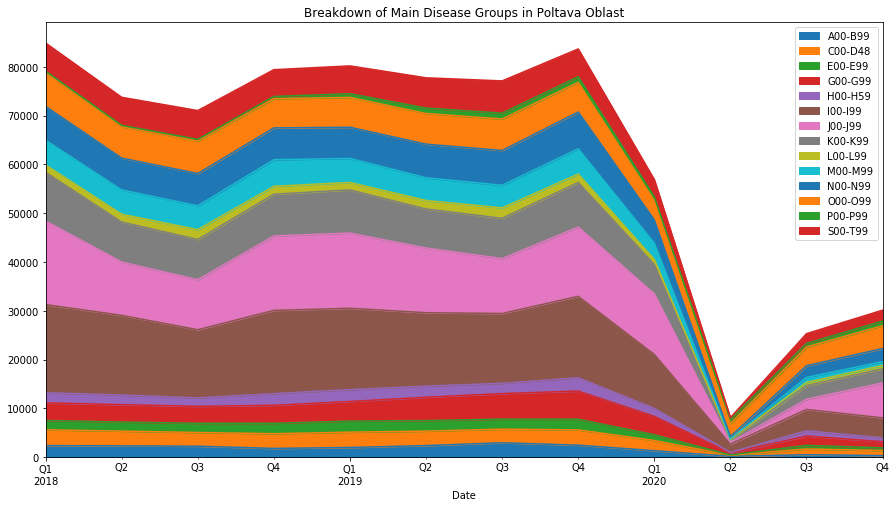

In [166]:
plot = poltava1820_corr_L1_Q_pivot_2.plot.area(figsize = (15, 8), title = 'Breakdown of Main Disease Groups in Poltava Oblast')
plt.legend(loc='upper right')

fig = plot.get_figure()
#fig.savefig("./images/Poltava_Diseases_Breakdown.png")

In [167]:
poltava1820_corr_L1_Q_pivot_2.columns.values

array(['A00-B99', 'C00-D48', 'E00-E99', 'G00-G99', 'H00-H59', 'I00-I99',
       'J00-J99', 'K00-K99', 'L00-L99', 'M00-M99', 'N00-N99', 'O00-O99',
       'P00-P99', 'S00-T99'], dtype=object)

In [168]:
poltava1820_corr_L1_Q_pivot_2.columns = ['Infectious Diseases', 'Tumors', 'Endocrine Diseases', 'Nervous Diseases', 'Eyes Diseases', \
                                     'Circulatory System Diseases', 'Respiratory Diseases', 'Digestion Diseases', \
                                     'Skin Diseases', 'Musles and Bones Diseases', 'Urinary Diseases', \
                                     'Pregnancy/Childbirth Complications', 'Perinatal Disorders', 'Injuries and Poisoning']

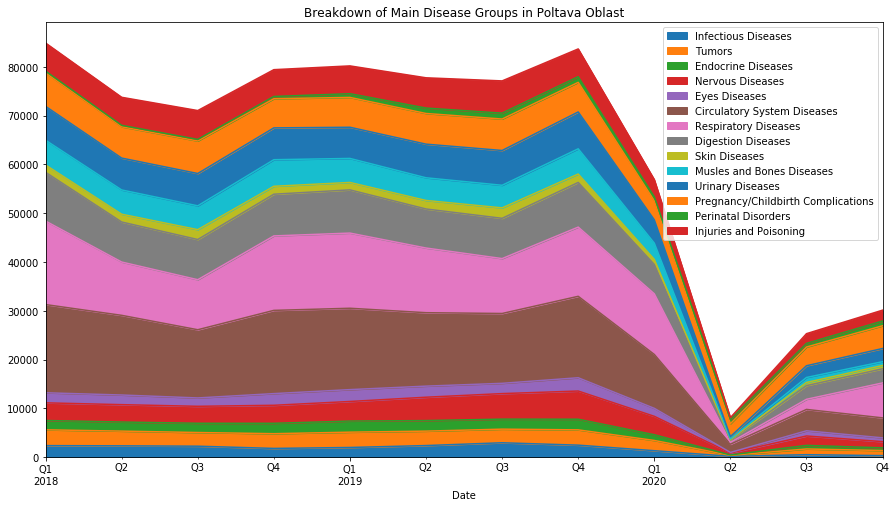

In [173]:
plot = poltava1820_corr_L1_Q_pivot_2.plot.area(figsize = (15, 8), title = 'Breakdown of Main Disease Groups in Poltava Oblast')
plt.legend(loc='upper right')

fig = plot.get_figure()

fig.savefig("./images/Poltava_Diseases_Breakdown.png")

In [170]:
poltava1820_corr_L1_Q_pivot_div_2 =  poltava1820_corr_L1_Q_pivot_div.drop(RemoveCodesList, axis = 1)

In [174]:
poltava1820_corr_L1_Q_pivot_div_2.columns = ['Infectious Diseases', 'Tumors', 'Endocrine Diseases', 'Nervous Diseases', 'Eyes Diseases', \
                                     'Circulatory System Diseases', 'Respiratory Diseases', 'Digestion Diseases', \
                                     'Skin Diseases', 'Musles and Bones Diseases', 'Urinary Diseases', \
                                     'Pregnancy/Childbirth Complications', 'Perinatal Disorders', 'Injuries and Poisoning']

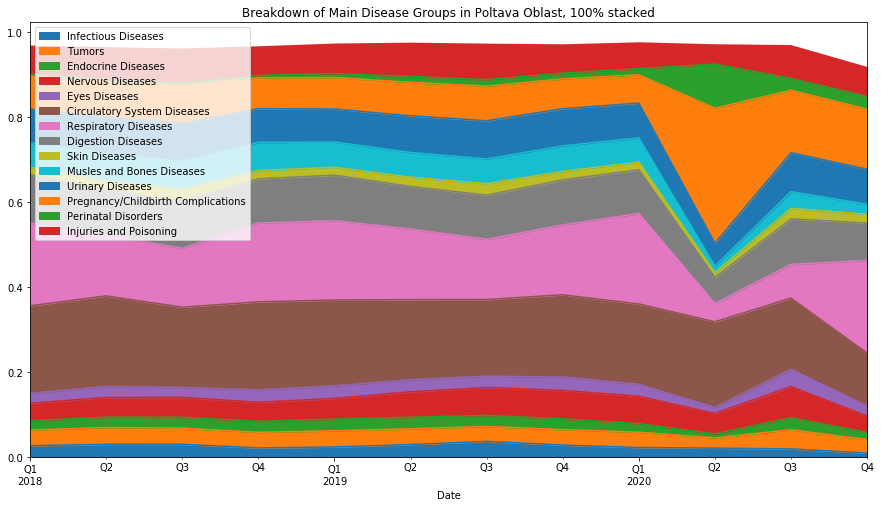

In [175]:

plot2 = poltava1820_corr_L1_Q_pivot_div_2.plot.area(figsize = (15, 8), stacked = True, title = "Breakdown of Main Disease Groups in Poltava Oblast, 100% stacked")


plt.legend(loc='upper left')
fig = plot2.get_figure()
fig.savefig("./images/Poltava_Diseases_Breakdown_Staked.png")

In [176]:
RemoveCodesList

['D50-D89',
 'F00-F99',
 'H60-H99',
 'Q00-Q99',
 'R00-R99',
 'U00-U85',
 'U78-U88',
 'V00-Z99',
 'Z00-Z99']

In [178]:
poltava1820_corr_L1_Q_pivot_other =  poltava1820_corr_L1_Q_pivot.loc[:, RemoveCodesList]
poltava1820_corr_L1_Q_pivot_other

,D50-D89,F00-F99,H60-H99,Q00-Q99,R00-R99,U00-U85,U78-U88,V00-Z99,Z00-Z99
Date,,,,,,,,,
2018-03-31,287.0,1116.0,441.0,393.0,473.0,0.0,0.0,15.0,301.0
2018-06-30,341.0,1062.0,432.0,405.0,408.0,0.0,0.0,20.0,267.0
2018-09-30,318.0,1164.0,462.0,379.0,449.0,0.0,0.0,33.0,258.0
2018-12-31,312.0,977.0,488.0,420.0,471.0,0.0,0.0,30.0,285.0
2019-03-31,406.0,312.0,564.0,462.0,466.0,0.0,0.0,23.0,226.0
2019-06-30,405.0,255.0,502.0,509.0,397.0,0.0,0.0,8.0,136.0
2019-09-30,439.0,298.0,599.0,526.0,371.0,0.0,0.0,4.0,141.0
2019-12-31,447.0,759.0,516.0,502.0,382.0,0.0,0.0,0.0,120.0
2020-03-31,252.0,383.0,274.0,307.0,228.0,0.0,0.0,0.0,122.0


In [179]:
poltava1820_corr_L1_Q_pivot_other['Other'] = poltava1820_corr_L1_Q_pivot_other.sum(axis=1)
poltava1820_corr_L1_Q_pivot_other
#df[li].sum(axis=1)

,D50-D89,F00-F99,H60-H99,Q00-Q99,R00-R99,U00-U85,U78-U88,V00-Z99,Z00-Z99,Other
Date,,,,,,,,,,
2018-03-31,287.0,1116.0,441.0,393.0,473.0,0.0,0.0,15.0,301.0,3026.0
2018-06-30,341.0,1062.0,432.0,405.0,408.0,0.0,0.0,20.0,267.0,2935.0
2018-09-30,318.0,1164.0,462.0,379.0,449.0,0.0,0.0,33.0,258.0,3063.0
2018-12-31,312.0,977.0,488.0,420.0,471.0,0.0,0.0,30.0,285.0,2983.0
2019-03-31,406.0,312.0,564.0,462.0,466.0,0.0,0.0,23.0,226.0,2459.0
2019-06-30,405.0,255.0,502.0,509.0,397.0,0.0,0.0,8.0,136.0,2212.0
2019-09-30,439.0,298.0,599.0,526.0,371.0,0.0,0.0,4.0,141.0,2378.0
2019-12-31,447.0,759.0,516.0,502.0,382.0,0.0,0.0,0.0,120.0,2726.0
2020-03-31,252.0,383.0,274.0,307.0,228.0,0.0,0.0,0.0,122.0,1566.0


In [180]:
287+1116+441+393+473+15+301

3026

In [181]:
poltava1820_corr_L1_Q_pivot_3 = poltava1820_corr_L1_Q_pivot_2

In [182]:
poltava1820_corr_L1_Q_pivot_3['Other'] = poltava1820_corr_L1_Q_pivot_other['Other']

In [183]:
poltava1820_corr_L1_Q_pivot_div_3 = poltava1820_corr_L1_Q_pivot_3.divide(poltava1820_corr_L1_Q_pivot_3.sum(axis=1), axis=0)
poltava1820_corr_L1_Q_pivot_div_3

,Infectious Diseases,Tumors,Endocrine Diseases,Nervous Diseases,Eyes Diseases,Circulatory System Diseases,Respiratory Diseases,Digestion Diseases,Skin Diseases,Musles and Bones Diseases,Urinary Diseases,Pregnancy/Childbirth Complications,Perinatal Disorders,Injuries and Poisoning,Other
Date,,,,,,,,,,,,,,,
2018-03-31,0.027014,0.036846,0.021746,0.041136,0.023441,0.205646,0.194677,0.113713,0.017023,0.057716,0.078984,0.078016,0.004108,0.065499,0.034434
2018-06-30,0.030377,0.039324,0.024312,0.046406,0.025772,0.212884,0.142427,0.106964,0.020829,0.064809,0.085182,0.083552,0.003952,0.074931,0.038280
2018-09-30,0.030453,0.037823,0.025580,0.046881,0.023150,0.188618,0.138308,0.111189,0.027308,0.065887,0.089375,0.089956,0.004333,0.079791,0.041347
2018-12-31,0.021850,0.036636,0.025844,0.044781,0.029037,0.207007,0.185181,0.103740,0.019689,0.066109,0.079146,0.072531,0.005608,0.066631,0.036211
2019-03-31,0.024108,0.037953,0.027545,0.048567,0.029409,0.201735,0.186365,0.107143,0.018432,0.059532,0.077286,0.073994,0.009234,0.068935,0.029760
2019-06-30,0.029834,0.036977,0.027082,0.059843,0.028396,0.188211,0.165708,0.100073,0.021841,0.058117,0.086213,0.078569,0.013923,0.077544,0.027670
2019-09-30,0.037208,0.035119,0.025808,0.065834,0.026462,0.180061,0.141520,0.103809,0.026915,0.058259,0.089703,0.081072,0.015188,0.083123,0.029922
2019-12-31,0.028597,0.036250,0.025274,0.066839,0.031492,0.193188,0.164162,0.105914,0.019983,0.059823,0.087401,0.070196,0.013430,0.065889,0.031561
2020-03-31,0.022810,0.035883,0.020021,0.064648,0.027926,0.188946,0.212526,0.102909,0.017762,0.056999,0.081725,0.066478,0.014357,0.060216,0.026797


In [187]:
poltava1820_corr_L1_Q_pivot_div_3 = poltava1820_corr_L1_Q_pivot_div_3.reset_index()

In [190]:
DatesList = ['2018-12-31', '2019-12-31', '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31']

In [191]:
poltava1820_corr_L1_Q_pivot_div_3_small = poltava1820_corr_L1_Q_pivot_div_3[poltava1820_corr_L1_Q_pivot_div_3['Date'].isin(DatesList)]

In [192]:
poltava1820_corr_L1_Q_pivot_div_3_small

,Date,Infectious Diseases,Tumors,Endocrine Diseases,Nervous Diseases,Eyes Diseases,Circulatory System Diseases,Respiratory Diseases,Digestion Diseases,Skin Diseases,Musles and Bones Diseases,Urinary Diseases,Pregnancy/Childbirth Complications,Perinatal Disorders,Injuries and Poisoning,Other
3,2018-12-31,0.021850,0.036636,0.025844,0.044781,0.029037,0.207007,0.185181,0.103740,0.019689,0.066109,0.079146,0.072531,0.005608,0.066631,0.036211
7,2019-12-31,0.028597,0.036250,0.025274,0.066839,0.031492,0.193188,0.164162,0.105914,0.019983,0.059823,0.087401,0.070196,0.013430,0.065889,0.031561
8,2020-03-31,0.022810,0.035883,0.020021,0.064648,0.027926,0.188946,0.212526,0.102909,0.017762,0.056999,0.081725,0.066478,0.014357,0.060216,0.026797
9,2020-06-30,0.021386,0.024014,0.009558,0.047909,0.013978,0.201434,0.043130,0.061529,0.010753,0.015412,0.053883,0.317085,0.103704,0.044803,0.031422
10,2020-09-30,0.019594,0.044955,0.028073,0.073486,0.040639,0.167176,0.079177,0.106982,0.024712,0.039149,0.091781,0.146513,0.027844,0.076618,0.033305
11,2020-12-31,0.009844,0.031630,0.016772,0.038588,0.023639,0.124362,0.217519,0.087962,0.020661,0.023548,0.082128,0.141468,0.029624,0.067605,0.084650


In [193]:
poltava1820_corr_L1_Q_pivot_div_3_small = poltava1820_corr_L1_Q_pivot_div_3_small.set_index('Date')

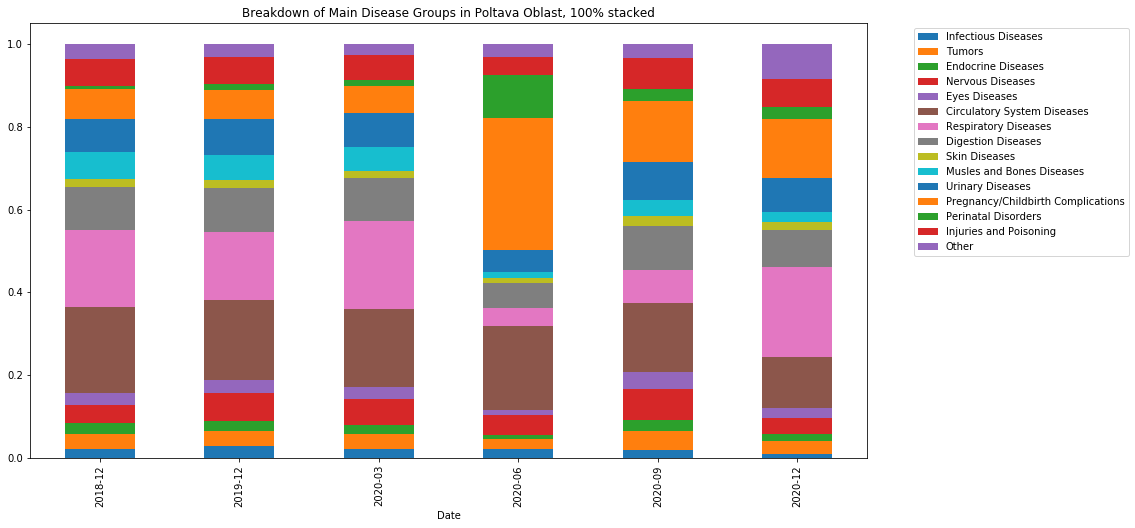

In [197]:
#H3Poltava_Q.plot(kind='bar',stacked=True, figsize = (15, 8), cmap = cmap)
#plot3 =poltava1820_corr_L1_Q_pivot_div_3_small.plot(kind = 'bar', figsize = (15, 8), stacked = True, title = "Breakdown of Main Disease Groups in Poltava Oblast, 100% stacked")
fig, ax = plt.subplots(figsize=(15,8))
poltava1820_corr_L1_Q_pivot_div_3_small.plot(ax = ax, kind='bar',stacked=True, title = "Breakdown of Main Disease Groups in Poltava Oblast, 100% stacked")
ax.xaxis.set_ticklabels(poltava1820_corr_L1_Q_pivot_div_3_small.index.to_period('M'))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

fig = plot3.get_figure()
#fig.savefig("./images/Poltava_Diseases_Breakdown_Staked.png")

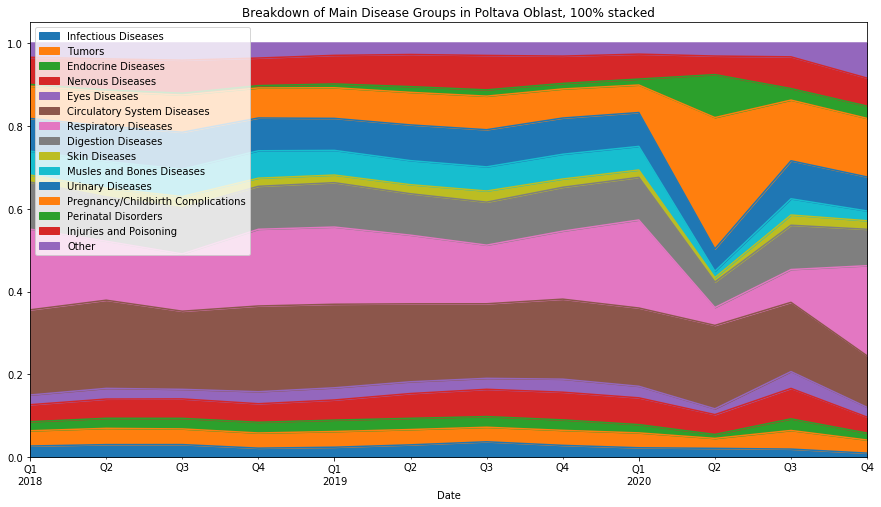

In [199]:
poltava1820_corr_L1_Q_pivot_div_3 = poltava1820_corr_L1_Q_pivot_div_3.set_index('Date')
plot4 = poltava1820_corr_L1_Q_pivot_div_3.plot.area(figsize = (15, 8), stacked = True, title = "Breakdown of Main Disease Groups in Poltava Oblast, 100% stacked")


plt.legend(loc='upper left')
fig = plot3.get_figure()
fig.savefig("./images/Poltava_Diseases_Breakdown_Staked_2.png")

In [200]:
poltava1820_corr_days_I0090 = poltava1820_corr_days[poltava1820_corr_days['Main_Diagnosis_L1'] == 'I00-I99']
poltava1820_corr_days_I0090_H_M = poltava1820_corr_days_I0090.groupby([pd.Grouper(key = 'Date', freq='M'),'Hospital_ID'])['MyRecord_ID'].nunique()
poltava1820_corr_days_I0090_H_M

Date        Hospital_ID
2018-01-31  1111581        307
            1111598         65
            1204147         16
            1204294         49
            1204348         67
                          ... 
2020-12-31  1999655        189
            1999684          2
            1999721         50
            5385571         15
            41318879        77
Name: MyRecord_ID, Length: 1290, dtype: int64

In [201]:
poltava1820_corr_days_I0090_H_M = poltava1820_corr_days_I0090_H_M.reset_index()

In [202]:
poltava1820_corr_days_I0090_H_M_pivot = poltava1820_corr_days_I0090_H_M.pivot_table(index="Date", columns="Hospital_ID", values="MyRecord_ID")
poltava1820_corr_days_I0090_H_M_pivot

Hospital_ID,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,1999218,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,307.0,65.0,16.0,49.0,67.0,157.0,452.0,83.0,112.0,160.0,...,61.0,256.0,254.0,309.0,NaN,175.0,NaN,148.0,27.0,265.0
2018-02-28,269.0,86.0,27.0,70.0,68.0,192.0,462.0,105.0,119.0,196.0,...,81.0,236.0,242.0,296.0,1.0,172.0,NaN,162.0,18.0,270.0
2018-03-31,194.0,89.0,25.0,83.0,53.0,162.0,485.0,99.0,104.0,224.0,...,60.0,235.0,255.0,328.0,NaN,174.0,NaN,166.0,18.0,266.0
2018-04-30,174.0,74.0,14.0,72.0,53.0,149.0,451.0,90.0,99.0,220.0,...,66.0,232.0,244.0,291.0,NaN,165.0,NaN,154.0,17.0,270.0
2018-05-31,190.0,79.0,16.0,86.0,60.0,145.0,453.0,77.0,106.0,188.0,...,46.0,189.0,236.0,331.0,NaN,185.0,NaN,155.0,25.0,251.0
2018-06-30,177.0,77.0,12.0,70.0,60.0,123.0,402.0,87.0,80.0,158.0,...,47.0,196.0,199.0,287.0,1.0,165.0,NaN,135.0,13.0,210.0
2018-07-31,156.0,68.0,8.0,62.0,49.0,113.0,388.0,62.0,76.0,156.0,...,55.0,178.0,195.0,251.0,2.0,143.0,NaN,130.0,16.0,202.0
2018-08-31,158.0,71.0,8.0,55.0,59.0,134.0,355.0,61.0,60.0,138.0,...,59.0,184.0,181.0,241.0,NaN,146.0,NaN,162.0,18.0,190.0
2018-09-30,177.0,49.0,8.0,52.0,56.0,155.0,338.0,58.0,91.0,154.0,...,46.0,190.0,190.0,281.0,1.0,141.0,NaN,149.0,18.0,190.0


In [203]:

poltava1820_corr_days_I0090_H_M_pivot.reset_index(inplace = True)

poltava1820_corr_days_I0090_H_M_pivot.fillna(0, inplace = True)

poltava1820_corr_days_I0090_H_M_pivot

Hospital_ID,Date,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
0,2018-01-31,307.0,65.0,16.0,49.0,67.0,157.0,452.0,83.0,112.0,...,61.0,256.0,254.0,309.0,0.0,175.0,0.0,148.0,27.0,265.0
1,2018-02-28,269.0,86.0,27.0,70.0,68.0,192.0,462.0,105.0,119.0,...,81.0,236.0,242.0,296.0,1.0,172.0,0.0,162.0,18.0,270.0
2,2018-03-31,194.0,89.0,25.0,83.0,53.0,162.0,485.0,99.0,104.0,...,60.0,235.0,255.0,328.0,0.0,174.0,0.0,166.0,18.0,266.0
3,2018-04-30,174.0,74.0,14.0,72.0,53.0,149.0,451.0,90.0,99.0,...,66.0,232.0,244.0,291.0,0.0,165.0,0.0,154.0,17.0,270.0
4,2018-05-31,190.0,79.0,16.0,86.0,60.0,145.0,453.0,77.0,106.0,...,46.0,189.0,236.0,331.0,0.0,185.0,0.0,155.0,25.0,251.0
5,2018-06-30,177.0,77.0,12.0,70.0,60.0,123.0,402.0,87.0,80.0,...,47.0,196.0,199.0,287.0,1.0,165.0,0.0,135.0,13.0,210.0
6,2018-07-31,156.0,68.0,8.0,62.0,49.0,113.0,388.0,62.0,76.0,...,55.0,178.0,195.0,251.0,2.0,143.0,0.0,130.0,16.0,202.0
7,2018-08-31,158.0,71.0,8.0,55.0,59.0,134.0,355.0,61.0,60.0,...,59.0,184.0,181.0,241.0,0.0,146.0,0.0,162.0,18.0,190.0
8,2018-09-30,177.0,49.0,8.0,52.0,56.0,155.0,338.0,58.0,91.0,...,46.0,190.0,190.0,281.0,1.0,141.0,0.0,149.0,18.0,190.0
9,2018-10-31,227.0,68.0,19.0,58.0,68.0,195.0,469.0,79.0,108.0,...,69.0,217.0,234.0,248.0,2.0,210.0,0.0,212.0,18.0,233.0


In [204]:

poltava1820_corr_days_I0090_H_M_pivot = poltava1820_corr_days_I0090_H_M_pivot.reset_index().rename_axis(None, axis=1)
poltava1820_corr_days_I0090_H_M_pivot

,index,Date,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
0,0,2018-01-31,307.0,65.0,16.0,49.0,67.0,157.0,452.0,83.0,...,61.0,256.0,254.0,309.0,0.0,175.0,0.0,148.0,27.0,265.0
1,1,2018-02-28,269.0,86.0,27.0,70.0,68.0,192.0,462.0,105.0,...,81.0,236.0,242.0,296.0,1.0,172.0,0.0,162.0,18.0,270.0
2,2,2018-03-31,194.0,89.0,25.0,83.0,53.0,162.0,485.0,99.0,...,60.0,235.0,255.0,328.0,0.0,174.0,0.0,166.0,18.0,266.0
3,3,2018-04-30,174.0,74.0,14.0,72.0,53.0,149.0,451.0,90.0,...,66.0,232.0,244.0,291.0,0.0,165.0,0.0,154.0,17.0,270.0
4,4,2018-05-31,190.0,79.0,16.0,86.0,60.0,145.0,453.0,77.0,...,46.0,189.0,236.0,331.0,0.0,185.0,0.0,155.0,25.0,251.0
5,5,2018-06-30,177.0,77.0,12.0,70.0,60.0,123.0,402.0,87.0,...,47.0,196.0,199.0,287.0,1.0,165.0,0.0,135.0,13.0,210.0
6,6,2018-07-31,156.0,68.0,8.0,62.0,49.0,113.0,388.0,62.0,...,55.0,178.0,195.0,251.0,2.0,143.0,0.0,130.0,16.0,202.0
7,7,2018-08-31,158.0,71.0,8.0,55.0,59.0,134.0,355.0,61.0,...,59.0,184.0,181.0,241.0,0.0,146.0,0.0,162.0,18.0,190.0
8,8,2018-09-30,177.0,49.0,8.0,52.0,56.0,155.0,338.0,58.0,...,46.0,190.0,190.0,281.0,1.0,141.0,0.0,149.0,18.0,190.0
9,9,2018-10-31,227.0,68.0,19.0,58.0,68.0,195.0,469.0,79.0,...,69.0,217.0,234.0,248.0,2.0,210.0,0.0,212.0,18.0,233.0


In [205]:
poltava1820_corr_days_I0090_H_M_pivot.drop(columns=['index'], inplace = True) 
poltava1820_corr_days_I0090_H_M_pivot

,Date,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
0,2018-01-31,307.0,65.0,16.0,49.0,67.0,157.0,452.0,83.0,112.0,...,61.0,256.0,254.0,309.0,0.0,175.0,0.0,148.0,27.0,265.0
1,2018-02-28,269.0,86.0,27.0,70.0,68.0,192.0,462.0,105.0,119.0,...,81.0,236.0,242.0,296.0,1.0,172.0,0.0,162.0,18.0,270.0
2,2018-03-31,194.0,89.0,25.0,83.0,53.0,162.0,485.0,99.0,104.0,...,60.0,235.0,255.0,328.0,0.0,174.0,0.0,166.0,18.0,266.0
3,2018-04-30,174.0,74.0,14.0,72.0,53.0,149.0,451.0,90.0,99.0,...,66.0,232.0,244.0,291.0,0.0,165.0,0.0,154.0,17.0,270.0
4,2018-05-31,190.0,79.0,16.0,86.0,60.0,145.0,453.0,77.0,106.0,...,46.0,189.0,236.0,331.0,0.0,185.0,0.0,155.0,25.0,251.0
5,2018-06-30,177.0,77.0,12.0,70.0,60.0,123.0,402.0,87.0,80.0,...,47.0,196.0,199.0,287.0,1.0,165.0,0.0,135.0,13.0,210.0
6,2018-07-31,156.0,68.0,8.0,62.0,49.0,113.0,388.0,62.0,76.0,...,55.0,178.0,195.0,251.0,2.0,143.0,0.0,130.0,16.0,202.0
7,2018-08-31,158.0,71.0,8.0,55.0,59.0,134.0,355.0,61.0,60.0,...,59.0,184.0,181.0,241.0,0.0,146.0,0.0,162.0,18.0,190.0
8,2018-09-30,177.0,49.0,8.0,52.0,56.0,155.0,338.0,58.0,91.0,...,46.0,190.0,190.0,281.0,1.0,141.0,0.0,149.0,18.0,190.0
9,2018-10-31,227.0,68.0,19.0,58.0,68.0,195.0,469.0,79.0,108.0,...,69.0,217.0,234.0,248.0,2.0,210.0,0.0,212.0,18.0,233.0


In [206]:
poltava1820_corr_days_I0090_H_M_pivot = poltava1820_corr_days_I0090_H_M_pivot.set_index('Date')

poltava1820_corr_days_I0090_H_M_pivot_div = poltava1820_corr_days_I0090_H_M_pivot.divide(poltava1820_corr_days_I0090_H_M_pivot.sum(axis=1), axis=0)
poltava1820_corr_days_I0090_H_M_pivot_div

,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,1999218,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,0.052149,0.011041,0.002718,0.008323,0.011381,0.026669,0.076779,0.014099,0.019025,0.027179,...,0.010362,0.043486,0.043146,0.052489,0.000000,0.029727,0.000000,0.025140,0.004586,0.045014
2018-02-28,0.044759,0.014309,0.004493,0.011647,0.011314,0.031947,0.076872,0.017471,0.019800,0.032612,...,0.013478,0.039268,0.040266,0.049251,0.000166,0.028619,0.000000,0.026955,0.002995,0.044925
2018-03-31,0.031417,0.014413,0.004049,0.013441,0.008583,0.026235,0.078543,0.016032,0.016842,0.036275,...,0.009717,0.038057,0.041296,0.053117,0.000000,0.028178,0.000000,0.026883,0.002915,0.043077
2018-04-30,0.030612,0.013019,0.002463,0.012667,0.009324,0.026214,0.079346,0.015834,0.017417,0.038705,...,0.011612,0.040816,0.042928,0.051196,0.000000,0.029029,0.000000,0.027094,0.002991,0.047502
2018-05-31,0.033814,0.014059,0.002847,0.015305,0.010678,0.025805,0.080619,0.013704,0.018865,0.033458,...,0.008187,0.033636,0.042000,0.058907,0.000000,0.032924,0.000000,0.027585,0.004449,0.044670
2018-06-30,0.035266,0.015342,0.002391,0.013947,0.011955,0.024507,0.080096,0.017334,0.015939,0.031480,...,0.009364,0.039052,0.039649,0.057183,0.000199,0.032875,0.000000,0.026898,0.002590,0.041841
2018-07-31,0.033412,0.014564,0.001713,0.013279,0.010495,0.024202,0.083101,0.013279,0.016278,0.033412,...,0.011780,0.038124,0.041765,0.053759,0.000428,0.030628,0.000000,0.027843,0.003427,0.043264
2018-08-31,0.034468,0.015489,0.001745,0.011998,0.012871,0.029232,0.077443,0.013307,0.013089,0.030105,...,0.012871,0.040140,0.039485,0.052574,0.000000,0.031850,0.000000,0.035340,0.003927,0.041449
2018-09-30,0.037500,0.010381,0.001695,0.011017,0.011864,0.032839,0.071610,0.012288,0.019280,0.032627,...,0.009746,0.040254,0.040254,0.059534,0.000212,0.029873,0.000000,0.031568,0.003814,0.040254


In [207]:

HMean = poltava1820_corr_days_I0090_H_M_pivot_div.mean(axis=0)

HMean

1111581     0.027240
1111598     0.015868
1204147     0.002180
1204294     0.012355
1204348     0.009047
1204377     0.023417
1999106     0.108205
1999112     0.010778
1999201     0.016106
1999218     0.038568
1999224     0.031405
1999253     0.017312
1999265     0.007911
1999276     0.025013
1999299     0.018714
1999307     0.032401
1999320     0.010314
1999336     0.015153
1999342     0.026048
1999359     0.025696
1999388     0.041958
1999394     0.010925
1999402     0.031770
1999425     0.032582
1999448     0.016256
1999460     0.018436
1999477     0.028252
1999483     0.016897
1999494     0.020175
1999514     0.026205
1999543     0.008626
1999613     0.052632
1999626     0.031858
1999655     0.076415
1999661     0.000092
1999678     0.026615
1999684     0.001631
1999721     0.033380
5385571     0.003527
41318879    0.048038
dtype: float64

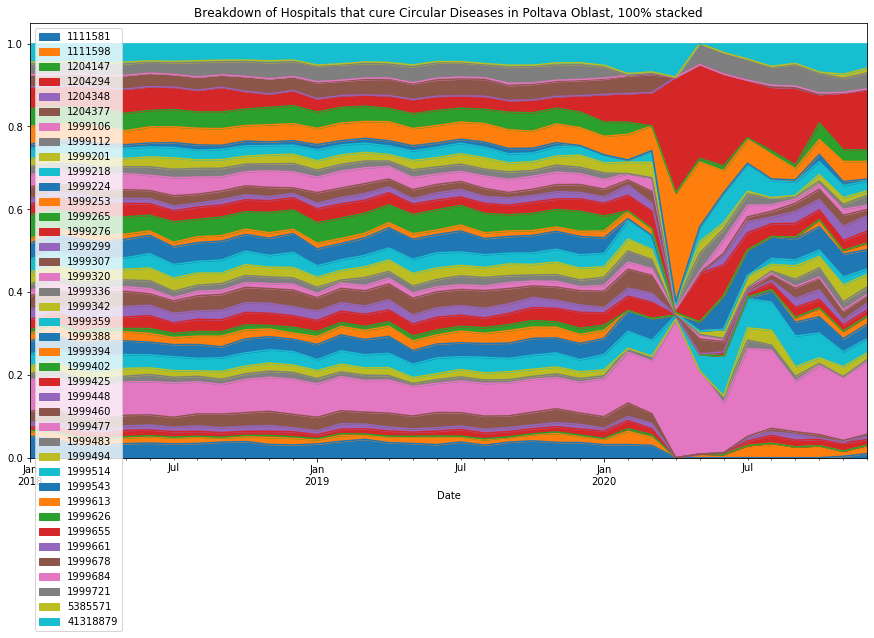

In [209]:

plot5 = poltava1820_corr_days_I0090_H_M_pivot_div.plot.area(figsize = (15, 8), label='_nolegend_', stacked = True, title = "Breakdown of Hospitals that cure Circular Diseases in Poltava Oblast, 100% stacked")


plt.legend(loc='upper left')

fig = plot5.get_figure()
#fig.savefig("./images/Poltava_Diseases_Breakdown_Staked_2.png")

In [210]:
poltava1820_corr_days_I0090_H_M_pivot_div_sorted = poltava1820_corr_days_I0090_H_M_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_M_pivot_div.index[-3], ascending=False).T

In [211]:
poltava1820_corr_days_I0090_H_M_pivot_div_sorted

,1999106,41318879,1999655,1999218,1999388,1999721,1999626,1999224,1999613,1999514,...,5385571,1204348,1999684,1999320,1999678,1999402,1999661,1204147,1999265,1111581
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,0.076779,0.045014,0.052489,0.027179,0.038390,0.025140,0.043146,0.032614,0.043486,0.023951,...,0.004586,0.011381,0.000000,0.012230,0.029727,0.057585,0.000000,0.002718,0.008493,0.052149
2018-02-28,0.076872,0.044925,0.049251,0.032612,0.041597,0.026955,0.040266,0.031448,0.039268,0.022463,...,0.002995,0.011314,0.000000,0.018802,0.028619,0.045424,0.000166,0.004493,0.007654,0.044759
2018-03-31,0.078543,0.043077,0.053117,0.036275,0.043401,0.026883,0.041296,0.032551,0.038057,0.023320,...,0.002915,0.008583,0.000000,0.013117,0.028178,0.048097,0.000000,0.004049,0.007449,0.031417
2018-04-30,0.079346,0.047502,0.051196,0.038705,0.041872,0.027094,0.042928,0.036066,0.040816,0.022167,...,0.002991,0.009324,0.000000,0.009148,0.029029,0.046974,0.000000,0.002463,0.010556,0.030612
2018-05-31,0.080619,0.044670,0.058907,0.033458,0.045026,0.027585,0.042000,0.032924,0.033636,0.025271,...,0.004449,0.010678,0.000000,0.011034,0.032924,0.041822,0.000000,0.002847,0.008187,0.033814
2018-06-30,0.080096,0.041841,0.057183,0.031480,0.044232,0.026898,0.039649,0.030683,0.039052,0.023909,...,0.002590,0.011955,0.000000,0.012353,0.032875,0.037856,0.000199,0.002391,0.011955,0.035266
2018-07-31,0.083101,0.043264,0.053759,0.033412,0.042622,0.027843,0.041765,0.029342,0.038124,0.025273,...,0.003427,0.010495,0.000000,0.007925,0.030628,0.049689,0.000428,0.001713,0.010495,0.033412
2018-08-31,0.077443,0.041449,0.052574,0.030105,0.045157,0.035340,0.039485,0.033595,0.040140,0.023342,...,0.003927,0.012871,0.000000,0.011126,0.031850,0.042103,0.000000,0.001745,0.011344,0.034468
2018-09-30,0.071610,0.040254,0.059534,0.032627,0.045763,0.031568,0.040254,0.026695,0.040254,0.024788,...,0.003814,0.011864,0.000000,0.009958,0.029873,0.045127,0.000212,0.001695,0.010805,0.037500


In [213]:
poltava1820_corr_days_I0090_H_M_pivot_div_sorted_small = poltava1820_corr_days_I0090_H_M_pivot_div_sorted.iloc[:, :6]

In [215]:
poltava1820_corr_days_I0090_H_M_pivot_div_sorted_small

,1999106,41318879,1999655,1999218,1999388,1999721
Date,,,,,,
2018-01-31,0.076779,0.045014,0.052489,0.027179,0.038390,0.025140
2018-02-28,0.076872,0.044925,0.049251,0.032612,0.041597,0.026955
2018-03-31,0.078543,0.043077,0.053117,0.036275,0.043401,0.026883
2018-04-30,0.079346,0.047502,0.051196,0.038705,0.041872,0.027094
2018-05-31,0.080619,0.044670,0.058907,0.033458,0.045026,0.027585
2018-06-30,0.080096,0.041841,0.057183,0.031480,0.044232,0.026898
2018-07-31,0.083101,0.043264,0.053759,0.033412,0.042622,0.027843
2018-08-31,0.077443,0.041449,0.052574,0.030105,0.045157,0.035340
2018-09-30,0.071610,0.040254,0.059534,0.032627,0.045763,0.031568


In [223]:
poltava1820_corr[poltava1820_corr['Hospital_ID'] == 1999106]['Hospital'].unique()

array(['КП "ПОЛТАВСЬКА ОБЛАСНА КЛІНІЧНА ЛІКАРНЯ ІМ. М.В.СКЛІФОСОВСЬКОГО ПОЛТАВСЬКОЇ ОБЛАСНОЇ РАДИ"',
       nan], dtype=object)

In [224]:
poltava1820_corr[poltava1820_corr['Hospital_ID'] == 41318879]['Hospital'].unique()

array(['КНМП "ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ "КРЕМЕНЧУЦЬКА"', nan],
      dtype=object)

In [225]:
poltava1820_corr[poltava1820_corr['Hospital_ID'] == 1999655]['Hospital'].unique()

array(['КП "1-А МІСЬКА КЛІНІЧНА ЛІКАРНЯ ПОЛТАВСЬКОЇ МІСЬКОЇ РАДИ"', nan],
      dtype=object)

In [226]:
poltava1820_corr[poltava1820_corr['Hospital_ID'] == 1999218]['Hospital'].unique()

array(['КНП "ГАДЯЦЬКА ЦЕНТРАЛЬНА РАЙОННА ЛІКАРНЯ" ГАДЯЦЬКОЇ РАЙОННОЇ РАДИ',
       nan], dtype=object)

In [227]:
poltava1820_corr[poltava1820_corr['Hospital_ID'] == 1999388]['Hospital'].unique()

array(['КП "ЛУБЕНСЬКА ЛІКАРНЯ ІНТЕНСИВНОГО ЛІКУВАННЯ" ЛУБЕНСЬКОЇ МІСЬКОЇ РАДИ',
       nan], dtype=object)

In [228]:
poltava1820_corr[poltava1820_corr['Hospital_ID'] == 1999721]['Hospital'].unique()

array(['КП "2-А МІСЬКА КЛІНІЧНА ЛІКАРНЯ ПОЛТАВСЬКОЇ МІСЬКОЇ РАДИ"', nan],
      dtype=object)

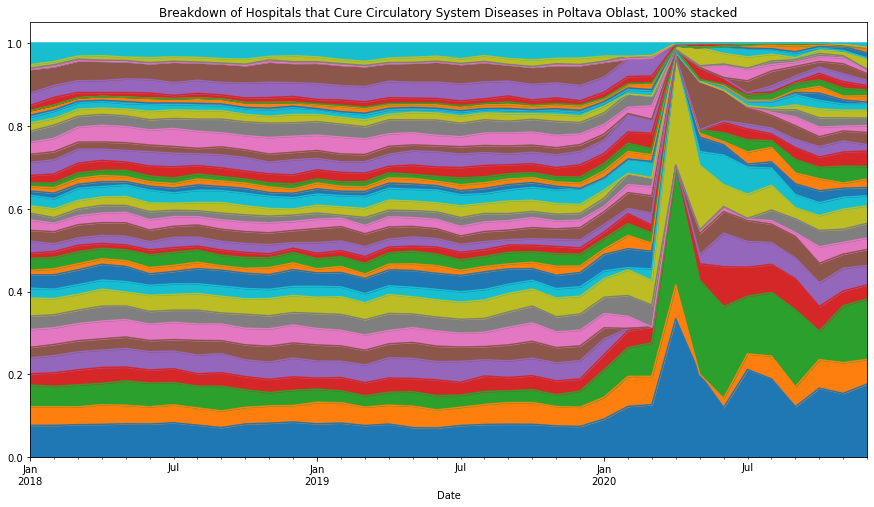

In [229]:

plot6 = poltava1820_corr_days_I0090_H_M_pivot_div_sorted.plot.area(figsize = (15, 8), legend = False, stacked = True, title = "Breakdown of Hospitals that Cure Circulatory System Diseases in Poltava Oblast, 100% stacked")
#plot7 = poltava1820_corr_days_I0090_H_M_pivot_div_sorted_small.plot.area(figsize = (15, 8),stacked = False)

#plt.legend(loc='upper left')

fig = plot6.get_figure()

In [243]:
poltava1820_corr_days_I0090_H_M_pivot_div = poltava1820_corr_days_I0090_H_M_pivot_div.reset_index()


In [247]:
poltava1820_corr_days_I0090_H_M_pivot_div = poltava1820_corr_days_I0090_H_M_pivot_div.drop(['index'], axis=1)

In [251]:
poltava1820_corr_days_I0090_H_Q_pivot_div = poltava1820_corr_days_I0090_H_M_pivot_div.set_index('Date').resample('Q').sum()
#data.set_index('date').groupby('id').resample('Q')['data_1', 'data_2'].sum()
poltava1820_corr_days_I0090_H_Q_pivot_div

,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,1999218,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.128325,0.039764,0.011259,0.033412,0.031278,0.084851,0.232194,0.047602,0.055667,0.096066,...,0.033556,0.120810,0.124708,0.154857,0.000166,0.086524,0.000000,0.078978,0.010496,0.133016
2018-06-30,0.099692,0.042420,0.007701,0.041919,0.031957,0.076526,0.240060,0.046872,0.052221,0.103643,...,0.029162,0.113504,0.124577,0.167286,0.000199,0.094828,0.000000,0.081576,0.010030,0.134013
2018-09-30,0.105380,0.040434,0.005154,0.036294,0.035230,0.086273,0.232155,0.038874,0.048646,0.096144,...,0.034396,0.118518,0.121504,0.165867,0.000640,0.092350,0.000000,0.094751,0.011167,0.124967
2018-12-31,0.101728,0.044768,0.011727,0.032016,0.034692,0.100469,0.247485,0.044473,0.056201,0.096086,...,0.031389,0.119723,0.125616,0.111649,0.000343,0.106322,0.000000,0.110889,0.011556,0.121441
2019-03-31,0.117011,0.034649,0.009577,0.033067,0.033847,0.092778,0.239649,0.036729,0.055565,0.090637,...,0.035009,0.122403,0.114141,0.087820,0.000392,0.110279,0.008044,0.111312,0.007559,0.145456
2019-06-30,0.102376,0.048190,0.005390,0.034354,0.025271,0.101626,0.222098,0.026407,0.047883,0.104881,...,0.035630,0.129285,0.104289,0.100166,0.000184,0.117258,0.008206,0.109483,0.011407,0.141182
2019-09-30,0.105559,0.036695,0.005453,0.043364,0.026219,0.092651,0.235466,0.025342,0.054498,0.100514,...,0.035259,0.130866,0.110505,0.089120,0.000632,0.117603,0.013828,0.104790,0.010480,0.144304
2019-12-31,0.114093,0.052507,0.007520,0.040016,0.029555,0.091822,0.229478,0.024677,0.050667,0.096878,...,0.021676,0.129421,0.120350,0.098251,0.000551,0.110574,0.008251,0.113151,0.012439,0.145522
2020-03-31,0.093100,0.063932,0.014700,0.051992,0.029208,0.084425,0.341602,0.027945,0.014618,0.115885,...,0.000837,0.166312,0.063794,0.216714,0.000206,0.122391,0.006712,0.026765,0.012367,0.193502


In [252]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q22018 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-3], ascending=False).T

In [253]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q12018 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-4], ascending=False).T

In [254]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q32018 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-2], ascending=False).T

In [255]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q42018 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-1], ascending=False).T

In [262]:
Top10_Q22018 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q22018.iloc[-3, :10].sum()

In [263]:
Top10_Q22018

2.6950626466044962

In [258]:
Top10_Q22018

0.6146616541353382

In [259]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q22018

,1999655,1999106,1999613,1999425,1999218,1999514,1999388,41318879,1999721,1999483,...,1999299,1999265,1999253,1204147,1999661,1999678,1999684,1999224,5385571,1111581
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.154857,0.232194,0.120810,0.087010,0.096066,0.069733,0.123388,0.133016,0.078978,0.053354,...,0.067476,0.023597,0.059207,0.011259,0.000166,0.086524,0.000000,0.096612,0.010496,0.128325
2018-06-30,0.167286,0.240060,0.113504,0.091269,0.103643,0.071348,0.131130,0.134013,0.081576,0.052002,...,0.073601,0.030697,0.062689,0.007701,0.000199,0.094828,0.000000,0.099674,0.010030,0.099692
2018-09-30,0.165867,0.232155,0.118518,0.084816,0.096144,0.073403,0.133541,0.124967,0.094751,0.062054,...,0.066297,0.032644,0.062626,0.005154,0.000640,0.092350,0.000000,0.089633,0.011167,0.105380
2018-12-31,0.111649,0.247485,0.119723,0.086656,0.096086,0.069218,0.127589,0.121441,0.110889,0.055171,...,0.069475,0.034902,0.054983,0.011727,0.000343,0.106322,0.000000,0.095491,0.011556,0.101728
2019-03-31,0.087820,0.239649,0.122403,0.099355,0.090637,0.072510,0.123185,0.145456,0.111312,0.049905,...,0.063216,0.031677,0.060978,0.009577,0.000392,0.110279,0.008044,0.111895,0.007559,0.117011
2019-06-30,0.100166,0.222098,0.129285,0.078410,0.104881,0.068840,0.141362,0.141182,0.109483,0.048499,...,0.068713,0.035160,0.069126,0.005390,0.000184,0.117258,0.008206,0.107681,0.011407,0.102376
2019-09-30,0.089120,0.235466,0.130866,0.067775,0.100514,0.072535,0.130021,0.144304,0.104790,0.052398,...,0.069188,0.039662,0.082968,0.005453,0.000632,0.117603,0.013828,0.103982,0.010480,0.105559
2019-12-31,0.098251,0.229478,0.129421,0.082347,0.096878,0.066539,0.130044,0.145522,0.113151,0.046011,...,0.061349,0.044094,0.074409,0.007520,0.000551,0.110574,0.008251,0.116018,0.012439,0.114093
2020-03-31,0.216714,0.341602,0.166312,0.111081,0.115885,0.051816,0.043414,0.193502,0.026765,0.016059,...,0.054189,0.012353,0.019354,0.014700,0.000206,0.122391,0.006712,0.142156,0.012367,0.093100


In [264]:
poltava1820_corr_days_I0090_H_M_pivot

,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,1999218,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,307.0,65.0,16.0,49.0,67.0,157.0,452.0,83.0,112.0,160.0,...,61.0,256.0,254.0,309.0,0.0,175.0,0.0,148.0,27.0,265.0
2018-02-28,269.0,86.0,27.0,70.0,68.0,192.0,462.0,105.0,119.0,196.0,...,81.0,236.0,242.0,296.0,1.0,172.0,0.0,162.0,18.0,270.0
2018-03-31,194.0,89.0,25.0,83.0,53.0,162.0,485.0,99.0,104.0,224.0,...,60.0,235.0,255.0,328.0,0.0,174.0,0.0,166.0,18.0,266.0
2018-04-30,174.0,74.0,14.0,72.0,53.0,149.0,451.0,90.0,99.0,220.0,...,66.0,232.0,244.0,291.0,0.0,165.0,0.0,154.0,17.0,270.0
2018-05-31,190.0,79.0,16.0,86.0,60.0,145.0,453.0,77.0,106.0,188.0,...,46.0,189.0,236.0,331.0,0.0,185.0,0.0,155.0,25.0,251.0
2018-06-30,177.0,77.0,12.0,70.0,60.0,123.0,402.0,87.0,80.0,158.0,...,47.0,196.0,199.0,287.0,1.0,165.0,0.0,135.0,13.0,210.0
2018-07-31,156.0,68.0,8.0,62.0,49.0,113.0,388.0,62.0,76.0,156.0,...,55.0,178.0,195.0,251.0,2.0,143.0,0.0,130.0,16.0,202.0
2018-08-31,158.0,71.0,8.0,55.0,59.0,134.0,355.0,61.0,60.0,138.0,...,59.0,184.0,181.0,241.0,0.0,146.0,0.0,162.0,18.0,190.0
2018-09-30,177.0,49.0,8.0,52.0,56.0,155.0,338.0,58.0,91.0,154.0,...,46.0,190.0,190.0,281.0,1.0,141.0,0.0,149.0,18.0,190.0


In [265]:
poltava1820_corr_days_I0090_H_M_pivot_div

,Date,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
0,2018-01-31,0.052149,0.011041,0.002718,0.008323,0.011381,0.026669,0.076779,0.014099,0.019025,...,0.010362,0.043486,0.043146,0.052489,0.000000,0.029727,0.000000,0.025140,0.004586,0.045014
1,2018-02-28,0.044759,0.014309,0.004493,0.011647,0.011314,0.031947,0.076872,0.017471,0.019800,...,0.013478,0.039268,0.040266,0.049251,0.000166,0.028619,0.000000,0.026955,0.002995,0.044925
2,2018-03-31,0.031417,0.014413,0.004049,0.013441,0.008583,0.026235,0.078543,0.016032,0.016842,...,0.009717,0.038057,0.041296,0.053117,0.000000,0.028178,0.000000,0.026883,0.002915,0.043077
3,2018-04-30,0.030612,0.013019,0.002463,0.012667,0.009324,0.026214,0.079346,0.015834,0.017417,...,0.011612,0.040816,0.042928,0.051196,0.000000,0.029029,0.000000,0.027094,0.002991,0.047502
4,2018-05-31,0.033814,0.014059,0.002847,0.015305,0.010678,0.025805,0.080619,0.013704,0.018865,...,0.008187,0.033636,0.042000,0.058907,0.000000,0.032924,0.000000,0.027585,0.004449,0.044670
5,2018-06-30,0.035266,0.015342,0.002391,0.013947,0.011955,0.024507,0.080096,0.017334,0.015939,...,0.009364,0.039052,0.039649,0.057183,0.000199,0.032875,0.000000,0.026898,0.002590,0.041841
6,2018-07-31,0.033412,0.014564,0.001713,0.013279,0.010495,0.024202,0.083101,0.013279,0.016278,...,0.011780,0.038124,0.041765,0.053759,0.000428,0.030628,0.000000,0.027843,0.003427,0.043264
7,2018-08-31,0.034468,0.015489,0.001745,0.011998,0.012871,0.029232,0.077443,0.013307,0.013089,...,0.012871,0.040140,0.039485,0.052574,0.000000,0.031850,0.000000,0.035340,0.003927,0.041449
8,2018-09-30,0.037500,0.010381,0.001695,0.011017,0.011864,0.032839,0.071610,0.012288,0.019280,...,0.009746,0.040254,0.040254,0.059534,0.000212,0.029873,0.000000,0.031568,0.003814,0.040254
9,2018-10-31,0.038883,0.011648,0.003255,0.009935,0.011648,0.033402,0.080336,0.013532,0.018499,...,0.011819,0.037170,0.040082,0.042480,0.000343,0.035971,0.000000,0.036314,0.003083,0.039911


In [261]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q22018.iloc[-3, :10]

1999655     0.727954
1999106     0.654986
1999613     0.472405
1999425     0.201156
1999218     0.145708
1999514     0.104468
1999388     0.103195
41318879    0.102814
1999721     0.102609
1999483     0.079767
Name: 2020-06-30 00:00:00, dtype: float64

In [ ]:
poltava1820_corr_days_I0090_H_M_pivot_div_sorted_small = poltava1820_corr_days_I0090_H_M_pivot_div_sorted.iloc[:, :6]

In [266]:
#poltava1820_corr_days_I0090 = poltava1820_corr_days[poltava1820_corr_days['Main_Diagnosis_L1'] == 'I00-I99']
poltava1820_corr_days_I0090_H_Q = poltava1820_corr_days_I0090.groupby([pd.Grouper(key = 'Date', freq='Q'),'Hospital_ID'])['MyRecord_ID'].nunique()
poltava1820_corr_days_I0090_H_Q

Date        Hospital_ID
2018-03-31  1111581        637
            1111598        204
            1204147         46
            1204294        179
            1204348        152
                          ... 
2020-12-31  1999655        423
            1999684          8
            1999721        150
            5385571         30
            41318879       237
Name: MyRecord_ID, Length: 451, dtype: int64

In [267]:
poltava1820_corr_days_I0090_H_Q = poltava1820_corr_days_I0090_H_Q.reset_index()

poltava1820_corr_days_I0090_H_Q_pivot = poltava1820_corr_days_I0090_H_Q.pivot_table(index="Date", columns="Hospital_ID", values="MyRecord_ID")
poltava1820_corr_days_I0090_H_Q_pivot

Hospital_ID,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,1999218,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,637.0,204.0,46.0,179.0,152.0,417.0,1191.0,223.0,277.0,472.0,...,174.0,595.0,647.0,801.0,1.0,442.0,NaN,402.0,55.0,669.0
2018-06-30,454.0,203.0,32.0,186.0,144.0,351.0,1125.0,206.0,236.0,466.0,...,140.0,528.0,596.0,773.0,1.0,431.0,NaN,374.0,47.0,602.0
2018-09-30,419.0,160.0,19.0,140.0,150.0,338.0,916.0,147.0,195.0,388.0,...,132.0,474.0,503.0,680.0,3.0,364.0,NaN,377.0,48.0,486.0
2018-12-31,489.0,213.0,48.0,142.0,165.0,474.0,1196.0,200.0,271.0,451.0,...,154.0,563.0,627.0,565.0,2.0,506.0,NaN,531.0,55.0,569.0
2019-03-31,550.0,160.0,36.0,154.0,155.0,418.0,1142.0,162.0,260.0,417.0,...,166.0,550.0,546.0,424.0,2.0,523.0,43.0,521.0,37.0,658.0
2019-06-30,468.0,220.0,24.0,148.0,115.0,437.0,976.0,109.0,216.0,447.0,...,156.0,560.0,450.0,444.0,1.0,505.0,37.0,473.0,50.0,579.0
2019-09-30,446.0,156.0,18.0,175.0,108.0,375.0,965.0,97.0,217.0,410.0,...,147.0,537.0,466.0,382.0,2.0,483.0,61.0,439.0,46.0,595.0
2019-12-31,559.0,251.0,32.0,182.0,137.0,419.0,1094.0,112.0,240.0,454.0,...,111.0,611.0,589.0,485.0,3.0,526.0,41.0,541.0,57.0,693.0
2020-03-31,298.0,196.0,31.0,157.0,86.0,259.0,1035.0,73.0,71.0,354.0,...,3.0,480.0,274.0,686.0,1.0,372.0,21.0,130.0,40.0,568.0


In [268]:
poltava1820_corr_days_I0090_H_Q = poltava1820_corr_days_I0090_H_Q.reset_index()

poltava1820_corr_days_I0090_H_Q_pivot = poltava1820_corr_days_I0090_H_Q.pivot_table(index="Date", columns="Hospital_ID", values="MyRecord_ID")
poltava1820_corr_days_I0090_H_Q_pivot


Hospital_ID,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,1999218,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,637.0,204.0,46.0,179.0,152.0,417.0,1191.0,223.0,277.0,472.0,...,174.0,595.0,647.0,801.0,1.0,442.0,NaN,402.0,55.0,669.0
2018-06-30,454.0,203.0,32.0,186.0,144.0,351.0,1125.0,206.0,236.0,466.0,...,140.0,528.0,596.0,773.0,1.0,431.0,NaN,374.0,47.0,602.0
2018-09-30,419.0,160.0,19.0,140.0,150.0,338.0,916.0,147.0,195.0,388.0,...,132.0,474.0,503.0,680.0,3.0,364.0,NaN,377.0,48.0,486.0
2018-12-31,489.0,213.0,48.0,142.0,165.0,474.0,1196.0,200.0,271.0,451.0,...,154.0,563.0,627.0,565.0,2.0,506.0,NaN,531.0,55.0,569.0
2019-03-31,550.0,160.0,36.0,154.0,155.0,418.0,1142.0,162.0,260.0,417.0,...,166.0,550.0,546.0,424.0,2.0,523.0,43.0,521.0,37.0,658.0
2019-06-30,468.0,220.0,24.0,148.0,115.0,437.0,976.0,109.0,216.0,447.0,...,156.0,560.0,450.0,444.0,1.0,505.0,37.0,473.0,50.0,579.0
2019-09-30,446.0,156.0,18.0,175.0,108.0,375.0,965.0,97.0,217.0,410.0,...,147.0,537.0,466.0,382.0,2.0,483.0,61.0,439.0,46.0,595.0
2019-12-31,559.0,251.0,32.0,182.0,137.0,419.0,1094.0,112.0,240.0,454.0,...,111.0,611.0,589.0,485.0,3.0,526.0,41.0,541.0,57.0,693.0
2020-03-31,298.0,196.0,31.0,157.0,86.0,259.0,1035.0,73.0,71.0,354.0,...,3.0,480.0,274.0,686.0,1.0,372.0,21.0,130.0,40.0,568.0


In [269]:

poltava1820_corr_days_I0090_H_Q_pivot.reset_index(inplace = True)

poltava1820_corr_days_I0090_H_Q_pivot.fillna(0, inplace = True)

poltava1820_corr_days_I0090_H_Q_pivot

Hospital_ID,Date,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
0,2018-03-31,637.0,204.0,46.0,179.0,152.0,417.0,1191.0,223.0,277.0,...,174.0,595.0,647.0,801.0,1.0,442.0,0.0,402.0,55.0,669.0
1,2018-06-30,454.0,203.0,32.0,186.0,144.0,351.0,1125.0,206.0,236.0,...,140.0,528.0,596.0,773.0,1.0,431.0,0.0,374.0,47.0,602.0
2,2018-09-30,419.0,160.0,19.0,140.0,150.0,338.0,916.0,147.0,195.0,...,132.0,474.0,503.0,680.0,3.0,364.0,0.0,377.0,48.0,486.0
3,2018-12-31,489.0,213.0,48.0,142.0,165.0,474.0,1196.0,200.0,271.0,...,154.0,563.0,627.0,565.0,2.0,506.0,0.0,531.0,55.0,569.0
4,2019-03-31,550.0,160.0,36.0,154.0,155.0,418.0,1142.0,162.0,260.0,...,166.0,550.0,546.0,424.0,2.0,523.0,43.0,521.0,37.0,658.0
5,2019-06-30,468.0,220.0,24.0,148.0,115.0,437.0,976.0,109.0,216.0,...,156.0,560.0,450.0,444.0,1.0,505.0,37.0,473.0,50.0,579.0
6,2019-09-30,446.0,156.0,18.0,175.0,108.0,375.0,965.0,97.0,217.0,...,147.0,537.0,466.0,382.0,2.0,483.0,61.0,439.0,46.0,595.0
7,2019-12-31,559.0,251.0,32.0,182.0,137.0,419.0,1094.0,112.0,240.0,...,111.0,611.0,589.0,485.0,3.0,526.0,41.0,541.0,57.0,693.0
8,2020-03-31,298.0,196.0,31.0,157.0,86.0,259.0,1035.0,73.0,71.0,...,3.0,480.0,274.0,686.0,1.0,372.0,21.0,130.0,40.0,568.0
9,2020-06-30,0.0,11.0,0.0,3.0,1.0,0.0,249.0,15.0,1.0,...,4.0,188.0,14.0,380.0,0.0,0.0,0.0,60.0,0.0,45.0


In [270]:


poltava1820_corr_days_I0090_H_Q_pivot = poltava1820_corr_days_I0090_H_Q_pivot.reset_index().rename_axis(None, axis=1)

poltava1820_corr_days_I0090_H_Q_pivot.drop(columns=['index'], inplace = True) 
poltava1820_corr_days_I0090_H_Q_pivot

,Date,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
0,2018-03-31,637.0,204.0,46.0,179.0,152.0,417.0,1191.0,223.0,277.0,...,174.0,595.0,647.0,801.0,1.0,442.0,0.0,402.0,55.0,669.0
1,2018-06-30,454.0,203.0,32.0,186.0,144.0,351.0,1125.0,206.0,236.0,...,140.0,528.0,596.0,773.0,1.0,431.0,0.0,374.0,47.0,602.0
2,2018-09-30,419.0,160.0,19.0,140.0,150.0,338.0,916.0,147.0,195.0,...,132.0,474.0,503.0,680.0,3.0,364.0,0.0,377.0,48.0,486.0
3,2018-12-31,489.0,213.0,48.0,142.0,165.0,474.0,1196.0,200.0,271.0,...,154.0,563.0,627.0,565.0,2.0,506.0,0.0,531.0,55.0,569.0
4,2019-03-31,550.0,160.0,36.0,154.0,155.0,418.0,1142.0,162.0,260.0,...,166.0,550.0,546.0,424.0,2.0,523.0,43.0,521.0,37.0,658.0
5,2019-06-30,468.0,220.0,24.0,148.0,115.0,437.0,976.0,109.0,216.0,...,156.0,560.0,450.0,444.0,1.0,505.0,37.0,473.0,50.0,579.0
6,2019-09-30,446.0,156.0,18.0,175.0,108.0,375.0,965.0,97.0,217.0,...,147.0,537.0,466.0,382.0,2.0,483.0,61.0,439.0,46.0,595.0
7,2019-12-31,559.0,251.0,32.0,182.0,137.0,419.0,1094.0,112.0,240.0,...,111.0,611.0,589.0,485.0,3.0,526.0,41.0,541.0,57.0,693.0
8,2020-03-31,298.0,196.0,31.0,157.0,86.0,259.0,1035.0,73.0,71.0,...,3.0,480.0,274.0,686.0,1.0,372.0,21.0,130.0,40.0,568.0
9,2020-06-30,0.0,11.0,0.0,3.0,1.0,0.0,249.0,15.0,1.0,...,4.0,188.0,14.0,380.0,0.0,0.0,0.0,60.0,0.0,45.0


In [286]:

#poltava1820_corr_days_I0090_H_Q_pivot = poltava1820_corr_days_I0090_H_Q_pivot.set_index('Date')

poltava1820_corr_days_I0090_H_Q_pivot_div = poltava1820_corr_days_I0090_H_Q_pivot.divide(poltava1820_corr_days_I0090_H_Q_pivot.sum(axis=1), axis=0)
poltava1820_corr_days_I0090_H_Q_pivot_div

,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,1999218,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.042227,0.013523,0.003049,0.011866,0.010076,0.027643,0.078953,0.014783,0.018363,0.031289,...,0.011535,0.039443,0.042890,0.053099,0.000066,0.029301,0.000000,0.026649,0.003646,0.044349
2018-06-30,0.032980,0.014746,0.002325,0.013512,0.010461,0.025498,0.081723,0.014964,0.017144,0.033852,...,0.010170,0.038355,0.043295,0.056153,0.000073,0.031309,0.000000,0.027168,0.003414,0.043731
2018-09-30,0.035148,0.013422,0.001594,0.011744,0.012583,0.028353,0.076839,0.012331,0.016358,0.032548,...,0.011073,0.039762,0.042194,0.057042,0.000252,0.030534,0.000000,0.031625,0.004027,0.040768
2018-12-31,0.034127,0.014865,0.003350,0.009910,0.011515,0.033080,0.083467,0.013958,0.018913,0.031475,...,0.010747,0.039291,0.043757,0.039431,0.000140,0.035313,0.000000,0.037058,0.003838,0.039710
2019-03-31,0.039717,0.011554,0.002600,0.011121,0.011193,0.030185,0.082467,0.011698,0.018775,0.030113,...,0.011987,0.039717,0.039428,0.030618,0.000144,0.037767,0.003105,0.037623,0.002672,0.047516
2019-06-30,0.036131,0.016984,0.001853,0.011426,0.008878,0.033737,0.075349,0.008415,0.016676,0.034509,...,0.012044,0.043233,0.034741,0.034278,0.000077,0.038987,0.002856,0.036517,0.003860,0.044700
2019-09-30,0.036151,0.012645,0.001459,0.014185,0.008754,0.030396,0.078220,0.007863,0.017589,0.033233,...,0.011915,0.043528,0.037773,0.030964,0.000162,0.039151,0.004944,0.035584,0.003729,0.048229
2019-12-31,0.039291,0.017643,0.002249,0.012793,0.009630,0.029451,0.076896,0.007872,0.016869,0.031911,...,0.007802,0.042947,0.041400,0.034090,0.000211,0.036972,0.002882,0.038026,0.004006,0.048710
2020-03-31,0.031665,0.020827,0.003294,0.016683,0.009138,0.027521,0.109978,0.007757,0.007544,0.037616,...,0.000319,0.051004,0.029115,0.072893,0.000106,0.039528,0.002231,0.013814,0.004250,0.060355


In [287]:
c2 = poltava1820_corr_days_I0090_H_Q_pivot_div.sum(axis=1)
c2

Date
2018-03-31    1.0
2018-06-30    1.0
2018-09-30    1.0
2018-12-31    1.0
2019-03-31    1.0
2019-06-30    1.0
2019-09-30    1.0
2019-12-31    1.0
2020-03-31    1.0
2020-06-30    1.0
2020-09-30    1.0
2020-12-31    1.0
dtype: float64

In [288]:

poltava1820_corr_days_I0090_H_Q_pivot_div_sorted = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-3], ascending=False).T

poltava1820_corr_days_I0090_H_Q_pivot_div_sorted

,1999655,1999106,1999613,1999425,1999218,1999388,1999514,1999721,1999483,41318879,...,5385571,1999224,1204377,1999253,1999394,1999359,1999336,1999299,1999265,1111581
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.053099,0.078953,0.039443,0.028638,0.031289,0.041498,0.022340,0.026649,0.017899,0.044349,...,0.003646,0.032350,0.027643,0.019821,0.012993,0.031820,0.016374,0.022672,0.008154,0.042227
2018-06-30,0.056153,0.081723,0.038355,0.030292,0.033852,0.044821,0.023464,0.027168,0.017434,0.043731,...,0.003414,0.032835,0.025498,0.020340,0.012422,0.029275,0.018015,0.024117,0.010388,0.032980
2018-09-30,0.057042,0.076839,0.039762,0.028857,0.032548,0.044208,0.024075,0.031625,0.021223,0.040768,...,0.004027,0.029612,0.028353,0.021055,0.012331,0.030283,0.015099,0.022481,0.010653,0.035148
2018-12-31,0.039431,0.083467,0.039291,0.029172,0.031475,0.043478,0.023240,0.037058,0.018494,0.039710,...,0.003838,0.031754,0.033080,0.018354,0.011934,0.031544,0.016400,0.022960,0.011794,0.034127
2019-03-31,0.030618,0.082467,0.039717,0.032351,0.030113,0.041378,0.023830,0.037623,0.016320,0.047516,...,0.002672,0.037262,0.030185,0.019642,0.012421,0.026502,0.014009,0.020869,0.010543,0.039717
2019-06-30,0.034278,0.075349,0.043233,0.027407,0.034509,0.047016,0.022929,0.036517,0.016521,0.044700,...,0.003860,0.035513,0.033737,0.023083,0.011889,0.031344,0.017525,0.022697,0.011966,0.036131
2019-09-30,0.030964,0.078220,0.043528,0.023344,0.033233,0.045230,0.023912,0.035584,0.017914,0.048229,...,0.003729,0.034773,0.030396,0.027884,0.013293,0.027559,0.019292,0.022939,0.013131,0.036151
2019-12-31,0.034090,0.076896,0.042947,0.028818,0.031911,0.045125,0.022352,0.038026,0.015112,0.048710,...,0.004006,0.038167,0.029451,0.023969,0.011809,0.029310,0.015674,0.020032,0.014480,0.039291
2020-03-31,0.072893,0.109978,0.051004,0.036022,0.037616,0.020295,0.016683,0.013814,0.008288,0.060355,...,0.004250,0.041760,0.027521,0.009988,0.017001,0.034003,0.021996,0.017108,0.006376,0.031665


In [289]:
c3 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted.sum(axis=1)
c3

Date
2018-03-31    1.0
2018-06-30    1.0
2018-09-30    1.0
2018-12-31    1.0
2019-03-31    1.0
2019-06-30    1.0
2019-09-30    1.0
2019-12-31    1.0
2020-03-31    1.0
2020-06-30    1.0
2020-09-30    1.0
2020-12-31    1.0
dtype: float64

In [291]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted

,1999655,1999106,1999613,1999425,1999218,1999388,1999514,1999721,1999483,41318879,...,5385571,1999224,1204377,1999253,1999394,1999359,1999336,1999299,1999265,1111581
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.053099,0.078953,0.039443,0.028638,0.031289,0.041498,0.022340,0.026649,0.017899,0.044349,...,0.003646,0.032350,0.027643,0.019821,0.012993,0.031820,0.016374,0.022672,0.008154,0.042227
2018-06-30,0.056153,0.081723,0.038355,0.030292,0.033852,0.044821,0.023464,0.027168,0.017434,0.043731,...,0.003414,0.032835,0.025498,0.020340,0.012422,0.029275,0.018015,0.024117,0.010388,0.032980
2018-09-30,0.057042,0.076839,0.039762,0.028857,0.032548,0.044208,0.024075,0.031625,0.021223,0.040768,...,0.004027,0.029612,0.028353,0.021055,0.012331,0.030283,0.015099,0.022481,0.010653,0.035148
2018-12-31,0.039431,0.083467,0.039291,0.029172,0.031475,0.043478,0.023240,0.037058,0.018494,0.039710,...,0.003838,0.031754,0.033080,0.018354,0.011934,0.031544,0.016400,0.022960,0.011794,0.034127
2019-03-31,0.030618,0.082467,0.039717,0.032351,0.030113,0.041378,0.023830,0.037623,0.016320,0.047516,...,0.002672,0.037262,0.030185,0.019642,0.012421,0.026502,0.014009,0.020869,0.010543,0.039717
2019-06-30,0.034278,0.075349,0.043233,0.027407,0.034509,0.047016,0.022929,0.036517,0.016521,0.044700,...,0.003860,0.035513,0.033737,0.023083,0.011889,0.031344,0.017525,0.022697,0.011966,0.036131
2019-09-30,0.030964,0.078220,0.043528,0.023344,0.033233,0.045230,0.023912,0.035584,0.017914,0.048229,...,0.003729,0.034773,0.030396,0.027884,0.013293,0.027559,0.019292,0.022939,0.013131,0.036151
2019-12-31,0.034090,0.076896,0.042947,0.028818,0.031911,0.045125,0.022352,0.038026,0.015112,0.048710,...,0.004006,0.038167,0.029451,0.023969,0.011809,0.029310,0.015674,0.020032,0.014480,0.039291
2020-03-31,0.072893,0.109978,0.051004,0.036022,0.037616,0.020295,0.016683,0.013814,0.008288,0.060355,...,0.004250,0.041760,0.027521,0.009988,0.017001,0.034003,0.021996,0.017108,0.006376,0.031665


In [276]:
a = poltava1820_corr_days_I0090_H_Q_pivot_div.sum(axis=1)
a

Date
2018-03-31    3.0
2018-06-30    3.0
2018-09-30    3.0
2018-12-31    3.0
2019-03-31    3.0
2019-06-30    3.0
2019-09-30    3.0
2019-12-31    3.0
2020-03-31    3.0
2020-06-30    3.0
2020-09-30    3.0
2020-12-31    3.0
Freq: Q-DEC, dtype: float64

In [277]:
b = poltava1820_corr_days_I0090_H_M_pivot_div.sum(axis=1)
b

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
dtype: float64

In [278]:
poltava1820_corr_days_I0090_H_Q_pivot

,Date,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
0,2018-03-31,637.0,204.0,46.0,179.0,152.0,417.0,1191.0,223.0,277.0,...,174.0,595.0,647.0,801.0,1.0,442.0,0.0,402.0,55.0,669.0
1,2018-06-30,454.0,203.0,32.0,186.0,144.0,351.0,1125.0,206.0,236.0,...,140.0,528.0,596.0,773.0,1.0,431.0,0.0,374.0,47.0,602.0
2,2018-09-30,419.0,160.0,19.0,140.0,150.0,338.0,916.0,147.0,195.0,...,132.0,474.0,503.0,680.0,3.0,364.0,0.0,377.0,48.0,486.0
3,2018-12-31,489.0,213.0,48.0,142.0,165.0,474.0,1196.0,200.0,271.0,...,154.0,563.0,627.0,565.0,2.0,506.0,0.0,531.0,55.0,569.0
4,2019-03-31,550.0,160.0,36.0,154.0,155.0,418.0,1142.0,162.0,260.0,...,166.0,550.0,546.0,424.0,2.0,523.0,43.0,521.0,37.0,658.0
5,2019-06-30,468.0,220.0,24.0,148.0,115.0,437.0,976.0,109.0,216.0,...,156.0,560.0,450.0,444.0,1.0,505.0,37.0,473.0,50.0,579.0
6,2019-09-30,446.0,156.0,18.0,175.0,108.0,375.0,965.0,97.0,217.0,...,147.0,537.0,466.0,382.0,2.0,483.0,61.0,439.0,46.0,595.0
7,2019-12-31,559.0,251.0,32.0,182.0,137.0,419.0,1094.0,112.0,240.0,...,111.0,611.0,589.0,485.0,3.0,526.0,41.0,541.0,57.0,693.0
8,2020-03-31,298.0,196.0,31.0,157.0,86.0,259.0,1035.0,73.0,71.0,...,3.0,480.0,274.0,686.0,1.0,372.0,21.0,130.0,40.0,568.0
9,2020-06-30,0.0,11.0,0.0,3.0,1.0,0.0,249.0,15.0,1.0,...,4.0,188.0,14.0,380.0,0.0,0.0,0.0,60.0,0.0,45.0


In [281]:
poltava1820_corr_days_I0090_H_M_pivot


,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,1999218,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,307.0,65.0,16.0,49.0,67.0,157.0,452.0,83.0,112.0,160.0,...,61.0,256.0,254.0,309.0,0.0,175.0,0.0,148.0,27.0,265.0
2018-02-28,269.0,86.0,27.0,70.0,68.0,192.0,462.0,105.0,119.0,196.0,...,81.0,236.0,242.0,296.0,1.0,172.0,0.0,162.0,18.0,270.0
2018-03-31,194.0,89.0,25.0,83.0,53.0,162.0,485.0,99.0,104.0,224.0,...,60.0,235.0,255.0,328.0,0.0,174.0,0.0,166.0,18.0,266.0
2018-04-30,174.0,74.0,14.0,72.0,53.0,149.0,451.0,90.0,99.0,220.0,...,66.0,232.0,244.0,291.0,0.0,165.0,0.0,154.0,17.0,270.0
2018-05-31,190.0,79.0,16.0,86.0,60.0,145.0,453.0,77.0,106.0,188.0,...,46.0,189.0,236.0,331.0,0.0,185.0,0.0,155.0,25.0,251.0
2018-06-30,177.0,77.0,12.0,70.0,60.0,123.0,402.0,87.0,80.0,158.0,...,47.0,196.0,199.0,287.0,1.0,165.0,0.0,135.0,13.0,210.0
2018-07-31,156.0,68.0,8.0,62.0,49.0,113.0,388.0,62.0,76.0,156.0,...,55.0,178.0,195.0,251.0,2.0,143.0,0.0,130.0,16.0,202.0
2018-08-31,158.0,71.0,8.0,55.0,59.0,134.0,355.0,61.0,60.0,138.0,...,59.0,184.0,181.0,241.0,0.0,146.0,0.0,162.0,18.0,190.0
2018-09-30,177.0,49.0,8.0,52.0,56.0,155.0,338.0,58.0,91.0,154.0,...,46.0,190.0,190.0,281.0,1.0,141.0,0.0,149.0,18.0,190.0


In [282]:
307.0+269.0+194.0

770.0

In [284]:
poltava1820_corr_days_I0090_H_Q_pivot = poltava1820_corr_days_I0090_H_Q_pivot.set_index('Date')
poltava1820_corr_days_I0090_H_Q_pivot_div = poltava1820_corr_days_I0090_H_Q_pivot.divide(poltava1820_corr_days_I0090_H_Q_pivot.sum(axis=1), axis=0)
poltava1820_corr_days_I0090_H_Q_pivot_div

,1111581,1111598,1204147,1204294,1204348,1204377,1999106,1999112,1999201,1999218,...,1999543,1999613,1999626,1999655,1999661,1999678,1999684,1999721,5385571,41318879
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.042227,0.013523,0.003049,0.011866,0.010076,0.027643,0.078953,0.014783,0.018363,0.031289,...,0.011535,0.039443,0.042890,0.053099,0.000066,0.029301,0.000000,0.026649,0.003646,0.044349
2018-06-30,0.032980,0.014746,0.002325,0.013512,0.010461,0.025498,0.081723,0.014964,0.017144,0.033852,...,0.010170,0.038355,0.043295,0.056153,0.000073,0.031309,0.000000,0.027168,0.003414,0.043731
2018-09-30,0.035148,0.013422,0.001594,0.011744,0.012583,0.028353,0.076839,0.012331,0.016358,0.032548,...,0.011073,0.039762,0.042194,0.057042,0.000252,0.030534,0.000000,0.031625,0.004027,0.040768
2018-12-31,0.034127,0.014865,0.003350,0.009910,0.011515,0.033080,0.083467,0.013958,0.018913,0.031475,...,0.010747,0.039291,0.043757,0.039431,0.000140,0.035313,0.000000,0.037058,0.003838,0.039710
2019-03-31,0.039717,0.011554,0.002600,0.011121,0.011193,0.030185,0.082467,0.011698,0.018775,0.030113,...,0.011987,0.039717,0.039428,0.030618,0.000144,0.037767,0.003105,0.037623,0.002672,0.047516
2019-06-30,0.036131,0.016984,0.001853,0.011426,0.008878,0.033737,0.075349,0.008415,0.016676,0.034509,...,0.012044,0.043233,0.034741,0.034278,0.000077,0.038987,0.002856,0.036517,0.003860,0.044700
2019-09-30,0.036151,0.012645,0.001459,0.014185,0.008754,0.030396,0.078220,0.007863,0.017589,0.033233,...,0.011915,0.043528,0.037773,0.030964,0.000162,0.039151,0.004944,0.035584,0.003729,0.048229
2019-12-31,0.039291,0.017643,0.002249,0.012793,0.009630,0.029451,0.076896,0.007872,0.016869,0.031911,...,0.007802,0.042947,0.041400,0.034090,0.000211,0.036972,0.002882,0.038026,0.004006,0.048710
2020-03-31,0.031665,0.020827,0.003294,0.016683,0.009138,0.027521,0.109978,0.007757,0.007544,0.037616,...,0.000319,0.051004,0.029115,0.072893,0.000106,0.039528,0.002231,0.013814,0.004250,0.060355


In [285]:
c = poltava1820_corr_days_I0090_H_Q_pivot_div.sum(axis=1)
c

Date
2018-03-31    1.0
2018-06-30    1.0
2018-09-30    1.0
2018-12-31    1.0
2019-03-31    1.0
2019-06-30    1.0
2019-09-30    1.0
2019-12-31    1.0
2020-03-31    1.0
2020-06-30    1.0
2020-09-30    1.0
2020-12-31    1.0
dtype: float64

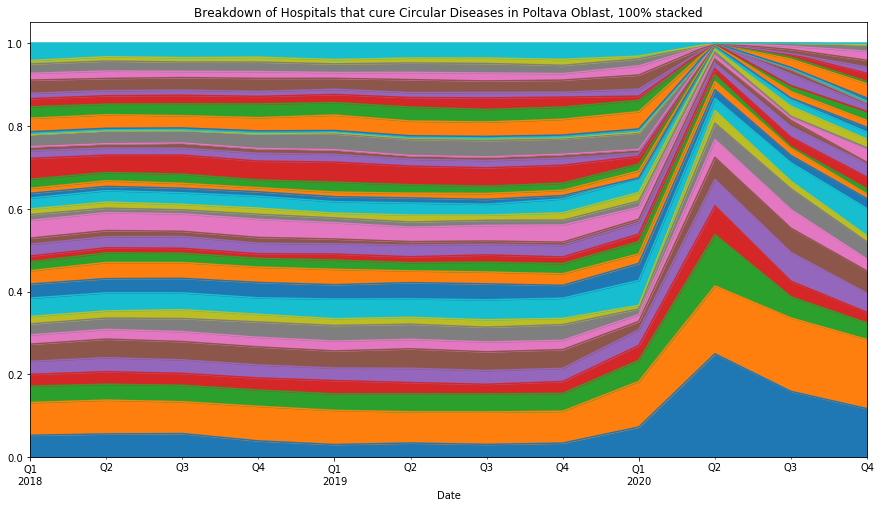

In [292]:
plot7 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted.plot.area(figsize = (15, 8), legend = False, stacked = True, title = "Breakdown of Hospitals that cure Circular Diseases in Poltava Oblast, 100% stacked")


#plt.legend(loc='upper left')

fig = plot7.get_figure()
#fig.savefig("./images/Poltava_Diseases_Breakdown_Staked_2.png")

In [293]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q22018 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-3], ascending=False).T


In [294]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q22018

,1999655,1999106,1999613,1999425,1999218,1999388,1999514,1999721,1999483,41318879,...,5385571,1999224,1204377,1999253,1999394,1999359,1999336,1999299,1999265,1111581
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.053099,0.078953,0.039443,0.028638,0.031289,0.041498,0.022340,0.026649,0.017899,0.044349,...,0.003646,0.032350,0.027643,0.019821,0.012993,0.031820,0.016374,0.022672,0.008154,0.042227
2018-06-30,0.056153,0.081723,0.038355,0.030292,0.033852,0.044821,0.023464,0.027168,0.017434,0.043731,...,0.003414,0.032835,0.025498,0.020340,0.012422,0.029275,0.018015,0.024117,0.010388,0.032980
2018-09-30,0.057042,0.076839,0.039762,0.028857,0.032548,0.044208,0.024075,0.031625,0.021223,0.040768,...,0.004027,0.029612,0.028353,0.021055,0.012331,0.030283,0.015099,0.022481,0.010653,0.035148
2018-12-31,0.039431,0.083467,0.039291,0.029172,0.031475,0.043478,0.023240,0.037058,0.018494,0.039710,...,0.003838,0.031754,0.033080,0.018354,0.011934,0.031544,0.016400,0.022960,0.011794,0.034127
2019-03-31,0.030618,0.082467,0.039717,0.032351,0.030113,0.041378,0.023830,0.037623,0.016320,0.047516,...,0.002672,0.037262,0.030185,0.019642,0.012421,0.026502,0.014009,0.020869,0.010543,0.039717
2019-06-30,0.034278,0.075349,0.043233,0.027407,0.034509,0.047016,0.022929,0.036517,0.016521,0.044700,...,0.003860,0.035513,0.033737,0.023083,0.011889,0.031344,0.017525,0.022697,0.011966,0.036131
2019-09-30,0.030964,0.078220,0.043528,0.023344,0.033233,0.045230,0.023912,0.035584,0.017914,0.048229,...,0.003729,0.034773,0.030396,0.027884,0.013293,0.027559,0.019292,0.022939,0.013131,0.036151
2019-12-31,0.034090,0.076896,0.042947,0.028818,0.031911,0.045125,0.022352,0.038026,0.015112,0.048710,...,0.004006,0.038167,0.029451,0.023969,0.011809,0.029310,0.015674,0.020032,0.014480,0.039291
2020-03-31,0.072893,0.109978,0.051004,0.036022,0.037616,0.020295,0.016683,0.013814,0.008288,0.060355,...,0.004250,0.041760,0.027521,0.009988,0.017001,0.034003,0.021996,0.017108,0.006376,0.031665


In [297]:
Top10_Q22020 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q22018.iloc[-3, :10].sum()

In [298]:
Top10_Q22020

0.8665351742274818

In [301]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted

,1999655,1999106,1999613,1999425,1999218,1999388,1999514,1999721,1999483,41318879,...,5385571,1999224,1204377,1999253,1999394,1999359,1999336,1999299,1999265,1111581
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.053099,0.078953,0.039443,0.028638,0.031289,0.041498,0.022340,0.026649,0.017899,0.044349,...,0.003646,0.032350,0.027643,0.019821,0.012993,0.031820,0.016374,0.022672,0.008154,0.042227
2018-06-30,0.056153,0.081723,0.038355,0.030292,0.033852,0.044821,0.023464,0.027168,0.017434,0.043731,...,0.003414,0.032835,0.025498,0.020340,0.012422,0.029275,0.018015,0.024117,0.010388,0.032980
2018-09-30,0.057042,0.076839,0.039762,0.028857,0.032548,0.044208,0.024075,0.031625,0.021223,0.040768,...,0.004027,0.029612,0.028353,0.021055,0.012331,0.030283,0.015099,0.022481,0.010653,0.035148
2018-12-31,0.039431,0.083467,0.039291,0.029172,0.031475,0.043478,0.023240,0.037058,0.018494,0.039710,...,0.003838,0.031754,0.033080,0.018354,0.011934,0.031544,0.016400,0.022960,0.011794,0.034127
2019-03-31,0.030618,0.082467,0.039717,0.032351,0.030113,0.041378,0.023830,0.037623,0.016320,0.047516,...,0.002672,0.037262,0.030185,0.019642,0.012421,0.026502,0.014009,0.020869,0.010543,0.039717
2019-06-30,0.034278,0.075349,0.043233,0.027407,0.034509,0.047016,0.022929,0.036517,0.016521,0.044700,...,0.003860,0.035513,0.033737,0.023083,0.011889,0.031344,0.017525,0.022697,0.011966,0.036131
2019-09-30,0.030964,0.078220,0.043528,0.023344,0.033233,0.045230,0.023912,0.035584,0.017914,0.048229,...,0.003729,0.034773,0.030396,0.027884,0.013293,0.027559,0.019292,0.022939,0.013131,0.036151
2019-12-31,0.034090,0.076896,0.042947,0.028818,0.031911,0.045125,0.022352,0.038026,0.015112,0.048710,...,0.004006,0.038167,0.029451,0.023969,0.011809,0.029310,0.015674,0.020032,0.014480,0.039291
2020-03-31,0.072893,0.109978,0.051004,0.036022,0.037616,0.020295,0.016683,0.013814,0.008288,0.060355,...,0.004250,0.041760,0.027521,0.009988,0.017001,0.034003,0.021996,0.017108,0.006376,0.031665


In [302]:
c5 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted.sum(axis=1)
c5

Date
2018-03-31    1.0
2018-06-30    1.0
2018-09-30    1.0
2018-12-31    1.0
2019-03-31    1.0
2019-06-30    1.0
2019-09-30    1.0
2019-12-31    1.0
2020-03-31    1.0
2020-06-30    1.0
2020-09-30    1.0
2020-12-31    1.0
dtype: float64

In [303]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q12020 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-4], ascending=False).T
Top10_Q12020 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q12020.iloc[-4, :10].sum()
Top10_Q12020

0.5249176495590266

In [ ]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q12020 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-4], ascending=False).T
Top10_Q12020 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q12020.iloc[-4, :10].sum()
Top10_Q12020

In [305]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q42019 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-5], ascending=False).T
Top10_Q42019 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q42019.iloc[-5, :10].sum()
Top10_Q42019

0.4507626344274971

In [306]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q32020 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-2], ascending=False).T
Top10_Q32020 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q32020.iloc[-2, :10].sum()
Top10_Q32020

0.7206878582595101

In [307]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q42020 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-1], ascending=False).T
Top10_Q42020 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q42020.iloc[-1, :10].sum()
Top10_Q42020

0.6310975609756098

In [273]:
poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q22018 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-3], ascending=False).T

poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q12018 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-4], ascending=False).T

poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q32018 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-2], ascending=False).T

poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q42018 = poltava1820_corr_days_I0090_H_Q_pivot_div.T.sort_values(poltava1820_corr_days_I0090_H_Q_pivot_div.index[-1], ascending=False).T

Top10_Q22018 = poltava1820_corr_days_I0090_H_Q_pivot_div_sorted_Q22018.iloc[-3, :10].sum()



In [274]:
Top10_Q22018


2.6950626466044962